<a href="https://colab.research.google.com/github/Adwait-56/Interpretable-CNN/blob/main/DL_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL Project Final Submission
Topic: Interpretable CNNs<br>
Paper: https://ieeexplore.ieee.org/document/8579018

Group Members:<br>
*Aaranya Prasad           (2019A7PS0107G)<br>
Dhyana Chidvilas Rotella (2019A7PS0093G)<br>
Manthan Asher            (2019A7PS0144G)<br>
Adwait Sudhir Kulkarni   (2019A7PS0120G)
<br>

*Withdrawn

Below are the links relevant to our submission

    

1.  Github Repo - https://github.com/Adwait-56/Interpretable-CNN
2.  Project Report - https://docs.google.com/document/d/1B5jj6HL8ZfOYlG8RHXWHXfyjPer37Yz8AYPSYEdiSkc/edit?pli=1
3.  Downloaded weights - https://drive.google.com/drive/folders/1tLKc8CBLYhYNS4G2PKoxaxeCYZWZnruo?usp=sharing


    
   



<u>NOTE</u>

Issues can arise during execution due to running out of memory. Try executing a single training loop only to resolve this. Please contact us in case you have any problems running the code.


# Interpretable Convolutional Networks

## <u> Introduction </u>

Neural Networks have been subject to being called “Black-boxes”. In simple terms, we know they are accurate, we don’t know how/why. This makes it harder for industries which use these networks in real-life to trust the decisions/predictions made by it. The explicit knowledge representation in an interpretable CNN can help people understand the logic inside a CNN, i.e. what patterns are memorized by the CNN for prediction. Experiments have shown that filters in an interpretable CNN are more semantically meaningful than those in a traditional CNN. This helps resolve the dataset bias and representation bias, which may not have detected by the test data/error.

### How do they work

In an interpretable CNN, each filter
in a high conv-layer represents a specific object part.
They use the same training data as any other traditional
CNNs without a need for any annotations of object
parts or textures for supervision. The interpretable CNN
automatically assigns each filter in a high conv-layer with
an object part during the learning process.

Interpretable CNNs are also helpful when the dataset has feature imbalances. For ex: Given a dataset of doctors & nurses, there will be more female nurses than male nurses in real-life. So, if a traditional CNN model is trained using this dataset, the model may focus on the facial features (i.e., male or female) to classify the image as a nurse. But this is not what the model is expected to learn, even though the accuracy may be great. In Interepretable CNNs' the model is trained in such a way that it focuses on the high activation regions (Here, the nurse hat, doctor's dress/stethoscope).

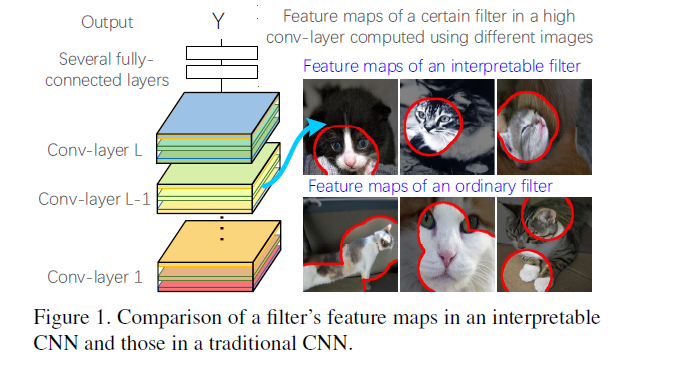

## <u> Method </u>

Here, they proposed a simple yet effective loss to push
a filter in a specific conv-layer of a CNN towards the representation
of an object part using masks. The loss encourages :- 
1. low entropy of inter-category activations i.e. each filter must encode a distinct object part that is exclusively contained by a single object category
2. low entropy of spatial distributions of neural activations. i.e. the filter
must be activated by a single part of the object, rather than
repetitively appear on different object regions.

Using this method, any CNN can be converted into an interpretable CNN.


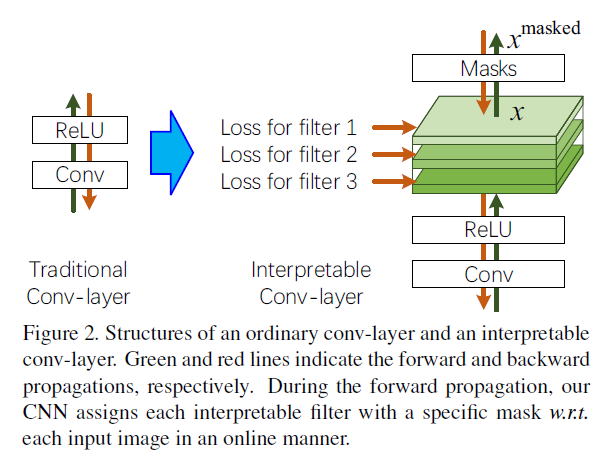

## <u> Overview of Algorithm </u>

Given a target conv-layer of a CNN, we expect each filter
in the conv-layer to be activated by a certain object part
of a certain category, while remain inactivated on images
of other categories.
<br><br>
During the forward propagation -
<p>
Given each input image I, the CNN computes a feature map x of the filter f after the ReLu operation, where x is an n×n matrix. The method then estimates the potential position of the object part on the feature map x as the neural unit with the strongest activation μ. Then based on the estimated part position μ, the CNN assigns a specific mask with x to filter out noisy activations.
</p>

During the backward propagation -
<p>
The loss function pushes filter f to represent a specific object part of category c and keep silent on other categories. If the Image I ϵ c, the feature map x is expected to fit to the assigned template $T_{c}$ else it will match a negative template $T^{-}$. During the back-propagation, each filter in an interpretable conv-layer receives gradients w.r.t. its feature map x from both the final task loss L(y^$_{k}$, y$^{*}_{k}$) on 
the k-th sample and the filter loss, $Loss_{f}$ , as follows:
</p>

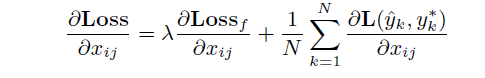
<br>
where λ is a weight and $Loss_{f}$ is defined as :-<br>
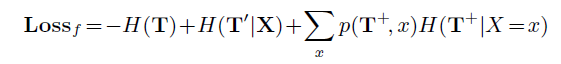

Here, the second term of equation represents Low inter-category cross entropy while the third term of equation represents Low spatial entropy.

#Measuring interpretability

###Part Interpretability:
Measures the object-part interpretability

###Location Instability
Measures the instability of part locations

###Visual inspection
Due to the nature of the interpretability implemented, filters in high covolutional layers are expected to have more specific activations which can be visualised. 

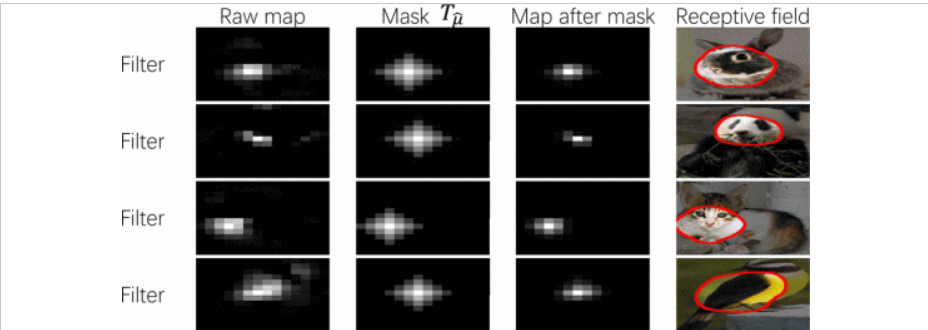


# Dataset 
The dataset we have chosen is Scene-Classification dataset. It is a multiclass balanced dataset with 6 classes:
1. Buildings
2. Forests
3. Mountains
4. Glacier
5. Street
6. Sea 

The dataset contains about ~17k labeled images from a wide range of natural scenes from all around the world. The task is to identify which kind of scene can the image be categorized into. The image dimensions are 150 x 150. The images are resized to 224x224, to be trained with AlexNet.

The dataset is from kaggle and can be found at https://www.kaggle.com/datasets/nitishabharathi/scene-classification.

### Why we chose this Dataset?
We required a multi-class dataset as Interpretable CNNs tend to perform better compared to traditional CNNs, on multi-class classification. The scenery images have objects like street lights(Streets), trees(Forest Class) etc. This is good choice considering the functioning of Interpretable CNNs and will also help in visualizing the the feature maps after masking the low activation region. For Ex: for classifying the image to be belonging to a Forest class, everything except the distinguishing features like trees and plants will be masked. The feature map after masking can be visualized.

Limitations of the Dataset:
1. The dataset contains relatively less data to train deeper models. However, as noted in the paper, this will be offset by using pretrained weights for the model and adding and tuning the masking layers which enhance interpretability.

#Methodology
<p>
In this project, a comparative study of  conventional CNNs and Interpretable CNNs is performed by training 2 versions of AlexNet and VGG-16 on the Scene-Classification dataset. The first version is the standard architecture known to all, while the second version modifies the architecture to include Convolution_Mask layers, which will help to introduce Interpretability to this model. </p> 

#Implementation

##Get Dataset

In [ ]:
! pip install kaggle --quiet
! pip install -q torch==1.2.0 torchvision==0.4.0 tensorboard scipy opencv-python matplotlib h5py pandas tensorboardX tools.lib

     |████████████████████████████████| 748.9 MB 729 bytes/s 
     |████████████████████████████████| 8.8 MB 19.5 MB/s 
     |████████████████████████████████| 125 kB 36.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.2.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.2.0 which is incompatible.


In [ ]:
!gdown --id 1vH4kRBqyUU5qtGfPnDu2StyTnOEbb2wA
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d nitishabharathi/scene-classification
% mkdir outputs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vH4kRBqyUU5qtGfPnDu2StyTnOEbb2wA
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 114kB/s]
 98% 355M/361M [00:02<00:00, 161MB/s]
100% 361M/361M [00:02<00:00, 176MB/s]


In [ ]:
! unzip -q scene-classification.zip

##Import libraries and initialize for reproducibility

In [ ]:
import os
import argparse
import cv2
import h5py
import random
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import math
import copy
import scipy.io as io
from scipy.io import loadmat
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
from torch.nn.parameter import Parameter
from torch.optim.optimizer import Optimizer, required
import torch.autograd.variable as Variable
from tensorboardX import SummaryWriter
from torch.utils.data import DataLoader
import skimage.io as skio
import matplotlib.pyplot as plt
from skimage import color
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
from torchsummary import summary
import torch.optim as optim
import cv2 as cv
from torchvision.utils import make_grid

In [ ]:
seed = 3214

#initialise various seeds
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED'] = str(seed)

##Process and load dataset

In [ ]:
df = pd.read_csv('train-scene classification/train.csv')

In [ ]:
df.head()

image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17034 entries, 0 to 17033
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  17034 non-null  object
 1   label       17034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 266.3+ KB


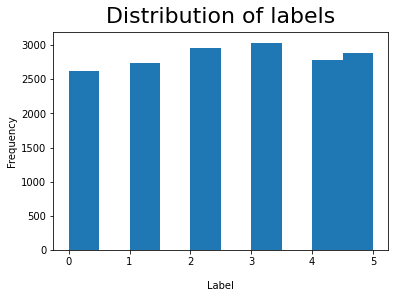

In [ ]:
df.info()
df['label'].plot(kind = 'hist')
plt.xlabel("Label", labelpad=14)
plt.title("Distribution of labels", y=1.015, fontsize=22);

In [ ]:
#Define dataset
class SceneDataset(Dataset):
    def __init__(self, annotations_csv, root_dir, transform=None):
        self.annotations = pd.read_csv(annotations_csv)
        self.root_dir = root_dir
        self.transform = transform
                    
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = skio.imread(img_path)
        label = torch.tensor(int(self.annotations.iloc[index, 1]))
        if self.transform:
            image = self.transform(image)
        return [image, label]

In [ ]:
#setting hyperparameters
LEARNING_RATE = 3e-4
BATCH_SIZE = 32
EPOCHS = 3
device = "cuda" if torch.cuda.is_available() else "cpu"

# Resize image to expected size(224*224) for AlexNet(Bilinear)
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

#define dataset
data = SceneDataset(annotations_csv="./train-scene classification/train.csv",
                      root_dir="./train-scene classification/train",
                      transform = transform_img)

#train, test, valid split
train_data, valid_data, test_data = torch.utils.data.random_split(data, [15034, 1000,1000])

#dataloaders
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
idx2label = {0: "Buildings", 1: "Forests", 2: "Mountains", 3: "Glacier", 4: "Sea", 5: "Street"}

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


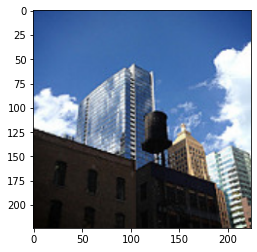

Label: Buildings


In [ ]:
#An image from the dataset
train_features,train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = img.permute(1,2,0)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {idx2label[label.item()]}")

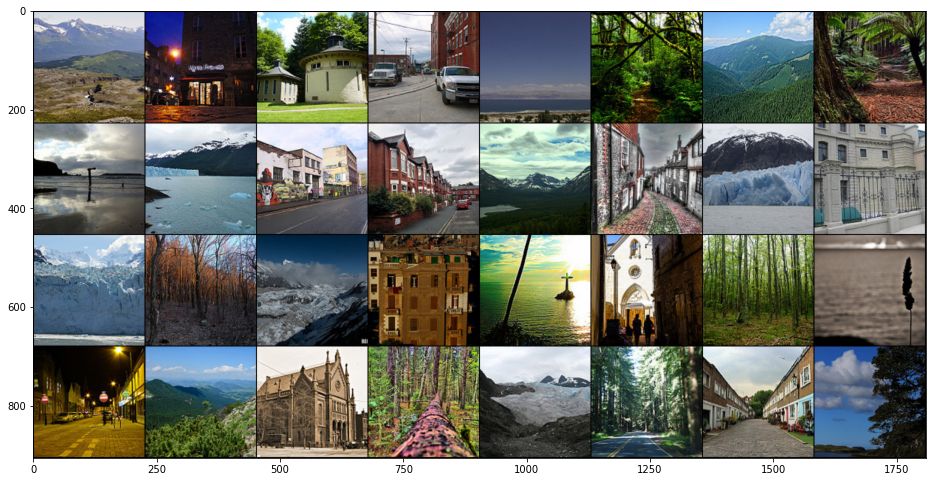

In [ ]:
def show_batch(loader):
    for img,_ in loader:
        plt.figure(figsize=(16,16))
        plt.imshow(make_grid(img,8).permute(1,2,0))
        break

show_batch(train_loader)

##Define AlexNet
We begin with AlexNet because it is a simpler model and was used in our paper. It will be easier to add and test the interpretability layers here before moving to deeper and newer models.
<br>
We demonstrate making a normal neural net more interpretable by adding the interpretability layers to the network in further sections.

In [ ]:
#vanilla AlexNet architecture, with dropout
class AlexNet(nn.Module):
    def __init__(self,num_classes,dropout):
        super(AlexNet, self).__init__()
        self.num_classes=num_classes
        self.dropout = dropout
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=2)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=self.num_classes)
        self.dropout = nn.Dropout(p = self.dropout)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0],-1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

We are using pre-trained weights to train the Vanilla AlexNet model just to do a Fair Comparison with Interpretable Models which perform better with Pre-Trained weights. The above shows the structure of a Vanilla Alexnet. We are not Freezing the weights in the layers to maintain consistency with the Interpretable Layers.

In [ ]:
model = models.alexnet(pretrained = True)
model.classifier[1] = nn.Linear(9216,4096)
model.classifier[4] = nn.Linear(4096,4096)
model.classifier[6] = nn.Linear(4096,len(idx2label))
device = "cuda" if torch.cuda.is_available() else "cpu"

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) 
model.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#make sure that gpu is being used
print(device)

cuda


In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224), batch_size=BATCH_SIZE, device="cuda")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 64, 55, 55]          23,296
              ReLU-2           [32, 64, 55, 55]               0
         MaxPool2d-3           [32, 64, 27, 27]               0
            Conv2d-4          [32, 192, 27, 27]         307,392
              ReLU-5          [32, 192, 27, 27]               0
         MaxPool2d-6          [32, 192, 13, 13]               0
            Conv2d-7          [32, 384, 13, 13]         663,936
              ReLU-8          [32, 384, 13, 13]               0
            Conv2d-9          [32, 256, 13, 13]         884,992
             ReLU-10          [32, 256, 13, 13]               0
           Conv2d-11          [32, 256, 13, 13]         590,080
             ReLU-12          [32, 256, 13, 13]               0
        MaxPool2d-13            [32, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [32, 25

In [ ]:
#to plot and save training details and best model
training_loss, validation_loss = float('inf'), float('inf')
training_loss_list = []
validation_loss_list = []

[1,   100] loss: 0.766
[1,   200] loss: 0.240
[1,   300] loss: 0.150
[1,   400] loss: 0.097
Epoch 1 training loss = 0.50 validation loss: 0.45
[2,   100] loss: 0.281
[2,   200] loss: 0.160
[2,   300] loss: 0.098
[2,   400] loss: 0.078
Epoch 2 training loss = 0.31 validation loss: 0.31
[3,   100] loss: 0.232
[3,   200] loss: 0.124
[3,   300] loss: 0.094
[3,   400] loss: 0.067
Epoch 3 training loss = 0.26 validation loss: 0.36
[4,   100] loss: 0.270
[4,   200] loss: 0.102
[4,   300] loss: 0.075
[4,   400] loss: 0.056
Epoch 4 training loss = 0.23 validation loss: 0.36
[5,   100] loss: 0.163
[5,   200] loss: 0.121
[5,   300] loss: 0.066
[5,   400] loss: 0.048
Epoch 5 training loss = 0.20 validation loss: 0.31


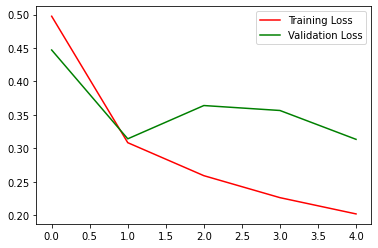

In [ ]:
# Training the model
model.train()
for epoch in range(5):
    running_loss = 0.0
    train_loss = 0.
    epoch_steps = 0
    for i, data in enumerate(train_loader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          train_loss += loss.item()
          epoch_steps += 1
          if i % 100 == 99:  # print every 100 mini-batches
              print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                              running_loss / epoch_steps))
              running_loss = 0.0
  
    val_loss = 0.0
    val_steps = 0
    total = 0
    correct = 0
    for i, data in enumerate(valid_loader, 0):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            val_loss += loss.cpu().numpy()
            val_steps += 1
    print(f"Epoch {epoch+1} training loss = {train_loss/len(train_loader):.2f} validation loss: {val_loss/len(valid_loader):.2f}")

    #record
    training_loss_list.append(train_loss/len(train_loader))
    validation_loss_list.append(val_loss/len(valid_loader))
    
    #save better model
    if(training_loss> train_loss/len(train_loader) and validation_loss>val_loss/len(valid_loader) ):
      training_loss, val_loss = train_loss/len(train_loader), val_loss/len(valid_loader)
      torch.save(model, './alex')

  # plotting the training process
plt.plot(training_loss_list, 'r', label = 'Training Loss')
plt.plot(validation_loss_list, 'g', label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
#load best/saved model
model_alex = torch.load('./alex')
model_alex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Evaluating on test
total = 0
correct = 0
val_loss = 0.0
val_steps = 0
for inputs, labels in test_loader:
  if torch.cuda.is_available():
        inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model_alex(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_steps += 1
print("Accuracy = ", correct/total)

Accuracy =  0.9


As per the above results, we get an accuracy of 90% on Vanilla Alexnet architecture using pre-trained weights on our Dataset without Conv Mask Layer

## Define VGG-16

We now demonstrate our dataset on VGG-16. Here we again attach the architecture to which we will later add Conv Mask layers.

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 6)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5) #dropout was included to combat overfitting
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

Just like before, We are using pre-trained weights to train the Vanilla VGG-16 model and are not Freezing the weights just to do a Fair Comparison with Interpretable Models.

In [ ]:
vgg = models.vgg16(pretrained = True)
vgg.classifier[0] = nn.Linear(25088, 4096)
vgg.classifier[3] = nn.Linear(4096, 4096)
vgg.classifier[6] = nn.Linear(4096, 6)
vgg.cuda()
summary(vgg, (3, 224, 224), batch_size=BATCH_SIZE, device="cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg.parameters(), lr=LEARNING_RATE) 
vgg.cuda()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 224, 224]           1,792
              ReLU-2         [32, 64, 224, 224]               0
            Conv2d-3         [32, 64, 224, 224]          36,928
              ReLU-4         [32, 64, 224, 224]               0
         MaxPool2d-5         [32, 64, 112, 112]               0
            Conv2d-6        [32, 128, 112, 112]          73,856
              ReLU-7        [32, 128, 112, 112]               0
            Conv2d-8        [32, 128, 112, 112]         147,584
              ReLU-9        [32, 128, 112, 112]               0
        MaxPool2d-10          [32, 128, 56, 56]               0
           Conv2d-11          [32, 256, 56, 56]         295,168
             ReLU-12          [32, 256, 56, 56]               0
           Conv2d-13          [32, 256, 56, 56]         590,080
             ReLU-14          [32, 256,

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#to plot and save training details and best model
training_loss, validation_loss = float('inf'), float('inf')
training_loss_list = []
validation_loss_list = []

[1,   100] loss: 0.425
[1,   200] loss: 0.181
[1,   300] loss: 0.114
[1,   400] loss: 0.097
Epoch 1 training loss = 0.37 validation loss: 0.30
[2,   100] loss: 0.320
[2,   200] loss: 0.151
[2,   300] loss: 0.094
[2,   400] loss: 0.080
Epoch 2 training loss = 0.30 validation loss: 0.26
[3,   100] loss: 0.258
[3,   200] loss: 0.125
[3,   300] loss: 0.087
[3,   400] loss: 0.063
Epoch 3 training loss = 0.26 validation loss: 0.30


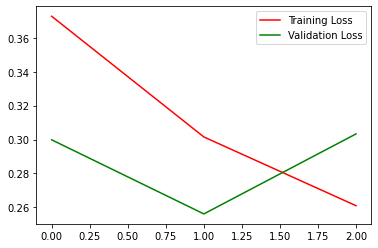

In [ ]:
# Training the model
#VGG vanilla

vgg.train()
for epoch in range(EPOCHS):
    running_loss = 0.0
    train_loss = 0.
    epoch_steps = 0
    for i, data in enumerate(train_loader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = vgg(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          train_loss += loss.item()
          epoch_steps += 1
          if i % 100 == 99:  # print every 100 mini-batches
              print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                              running_loss / epoch_steps))
              
              running_loss = 0.0
  
    val_loss = 0.0
    val_steps = 0
    total = 0
    correct = 0
    for i, data in enumerate(valid_loader, 0):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = vgg(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            val_loss += loss.cpu().numpy()
            val_steps += 1
    print(f"Epoch {epoch+1} training loss = {train_loss/len(train_loader):.2f} validation loss: {val_loss/len(valid_loader):.2f}")

    #record
    training_loss_list.append(train_loss/len(train_loader))
    validation_loss_list.append(val_loss/len(valid_loader))
    
    #save better model
    if(training_loss> train_loss/len(train_loader) and validation_loss>val_loss/len(valid_loader) ):
      training_loss, val_loss = train_loss/len(train_loader), val_loss/len(valid_loader)
      torch.save(vgg, './vgg16')

  # plotting the training process
plt.plot(training_loss_list, 'r', label = 'Training Loss')
plt.plot(validation_loss_list, 'g', label = 'Validation Loss')
plt.legend()
plt.show()

Due to Computational Resources and pre training, we just trained both the above models for less than 5 epochs

In [ ]:
#load best/saved model
model_vgg = torch.load('./vgg16')
model_vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#Evaluating on test
total = 0
correct = 0
val_loss = 0.0
val_steps = 0
for inputs, labels in test_loader:
  if torch.cuda.is_available():
        inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model_vgg(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_steps += 1
print("Accuracy = ", correct/total)

Accuracy =  0.917


As we can see, we are achieving 91.7% accuracy on VGG-16 model with pretrained weights on our dataset without Conv Mask layer

#Moving towards Interpretability

We now go on and demonstrate our Model on Interpretable Alexnet and VGG-16. We referred to this repository on interpretable CNN's by AdaShenn https://github.com/ada-shen/ICNN for making our interpretable Layers.

In [ ]:
#Define dataset
class SceneDataset2(Dataset):
    def __init__(self, annotations_csv, root_dir, transform=None):
        self.annotations = pd.read_csv(annotations_csv)
        self.root_dir = root_dir
        self.transform = transform
                    
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = skio.imread(img_path)
        label = torch.tensor(int(self.annotations.iloc[index, 1]))
        if self.transform:
            image = self.transform(image)
        return [image, label.view(1,1,1)]

In [ ]:
#setting hyperparameters
LEARNING_RATE = 3e-4
BATCH_SIZE2 = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

# Resize image to expected size(224*224) for AlexNet(Bilinear)
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

#define dataset
data2 = SceneDataset2(annotations_csv="./train-scene classification/train.csv",
                      root_dir="./train-scene classification/train",
                      transform = transform_img)

#train, test, valid split
train_data2, valid_data2, test_data2 = torch.utils.data.random_split(data2, [15034, 1000,1000])

#dataloaders
train_loader2 = DataLoader(dataset=train_data2, batch_size=BATCH_SIZE2, shuffle=True)
test_loader2 = DataLoader(dataset=test_data2, batch_size=BATCH_SIZE2, shuffle=True)
valid_loader2 = DataLoader(dataset=valid_data2, batch_size=BATCH_SIZE2, shuffle=True)

In [ ]:
##Init Model (Here we download the pretrained weights)

def get_net(model, model_path, label_num, dropoutrate, losstype):
    if(model == "vgg_vd_16"):
        pretrain_path = os.path.join(model_path,model+".mat")
        net = vgg_vd_16(pretrain_path, label_num, dropoutrate, losstype)
    elif(model == 'alexnet'):
        pretrain_path = os.path.join(model_path, model + ".mat")
        net = alexnet(pretrain_path, label_num, dropoutrate, losstype)
    return net


def download_pretrain(model,model_path):
    download_vgg_vd_16_path = "http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-16.mat"
    download_alexnet_path = "http://www.vlfeat.org/matconvnet/models/imagenet-caffe-alex.mat"

    if (model == "vgg_vd_16"):
        pretrain_path = os.path.join(model_path, model+".mat")
        print("downloading weights")
        if os.path.exists(pretrain_path) == False:
          os.system(" mkdir -p " + model_path)
          os.system(" wget -O " + pretrain_path + " --no-check-certificate " + download_vgg_vd_16_path)
    elif model == "alexnet":
        pretrain_path = os.path.join(model_path, model + ".mat")
        print("downloading weights")
        if os.path.exists(pretrain_path) == False:
            os.system(" mkdir -p " + model_path)
            os.system(" wget -O " + pretrain_path + " --no-check-certificate " + download_alexnet_path)
    else:
        print("error: no target model!")
        os.exit(0)


def init_model(root_path,args):
    model_path = os.path.join(root_path, 'model', args.model)
    download_pretrain(args.model,model_path)
    print("weights downloaded")
    net = get_net(args.model, model_path, args.label_num, args.dropoutrate, args.losstype)
    return net


## Interpretable AlexNet

Now we move on to modified AlexNet, which has the same architecture in terms of convolutional and maxpool layers, with the addition of convolution mask layers to introduce interpretability.

The following code block implements the Convolution Mask Layer as specified in the research paper.

In [ ]:
#@title
#Conv Mask Layer
class Divclass:
    def __init__(self, depthList, posList):
        self.depthList = depthList
        self.posList = posList


def getMu(x):
    IsuseMax = 0
    bs = x.size()[0]
    depth = x.size()[1]
    h = x.size()[2]
    w = x.size()[3]
    x = x.transpose(2, 3).reshape([bs, depth, h * w])
    if (IsuseMax):
        _, p = torch.max(x, dim=2)
        p = torch.reshape(p, (bs, depth, 1)).float()  # index is long type
        mu_y = torch.ceil(p / h)
        mu_x = p - (mu_y - 1) * h
        sqrtvar = torch.Tensor([])
    else:
        tmp_x = torch.Tensor(range(1, h + 1)).reshape(-1,
                                                      1).repeat([bs, depth, w, 1]).squeeze(3).cuda()
        tmp_y = torch.Tensor(range(1, w + 1)).repeat([bs, depth, h, 1])
        tmp_y = tmp_y.transpose(2, 3).reshape([bs, depth, h * w]).cuda()
        sumXtmp = torch.sum(x, 2).unsqueeze(2)
        sumX = torch.max(sumXtmp, (torch.ones(
            sumXtmp.size()).cuda() * 0.000000001))
        mu_xtmp = torch.round(
            (torch.sum(tmp_x.mul(x), 2).unsqueeze(2)).div(sumX))
        mu_x = torch.max(mu_xtmp, torch.ones(mu_xtmp.size()).cuda())
        mu_ytmp = torch.round(
            (torch.sum(tmp_y.mul(x), 2).unsqueeze(2)).div(sumX))
        mu_y = torch.max(mu_ytmp, torch.ones(mu_ytmp.size()).cuda())
        sqrtvartmp1 = mu_x.repeat([1, 1, h * w])
        sqrtvartmp2 = mu_y.repeat([1, 1, h * w])
        sqrtvar = torch.sqrt((torch.sum((tmp_x - sqrtvartmp1).mul(tmp_x - sqrtvartmp1).mul(x), 2).unsqueeze(
            2) + torch.sum((tmp_y - sqrtvartmp2).mul(tmp_y - sqrtvartmp2).mul(x), 2).unsqueeze(2)).div(sumX))
        p = (mu_x + (mu_y - 1) * h).reshape([bs, depth, 1, 1])
    tmp = torch.linspace(-1, 1, h).repeat(mu_x.size()).cuda()
    for i in range(bs):
        mu_x[i, :, :] = torch.gather(
            tmp[i, :, :], 1, (mu_x[i, :, :] - 1).long())
        mu_y[i, :, :] = torch.gather(
            tmp[i, :, :], 1, (mu_y[i, :, :] - 1).long())
    mu_x = mu_x.reshape([bs, depth, 1, 1])
    mu_y = mu_y.reshape([bs, depth, 1, 1])
    sqrtvar = sqrtvar.reshape([bs, depth])
    return mu_x, mu_y, sqrtvar


def getMask(mask_parameter, mask_weight, posTempX, posTempY, bs, depth, h, w):
    mask = torch.abs(posTempX - mask_parameter['mu_x'].repeat([1, 1, h, w]))
    mask = mask + torch.abs(posTempY -
                            mask_parameter['mu_y'].repeat([1, 1, h, w]))
    mask = 1 - mask.mul(mask_weight.reshape(depth, 1, 1).repeat([bs, 1, h, w]))
    mask = torch.max(mask, torch.ones(mask.size()).cuda() * (-1))
    for i in range(depth):
        if not (mask_parameter['filter'][i].equal(torch.ones(1))):
            mask[:, i, :, :] = 1
    return mask


def get_sliceMag(sliceMag, label, x):
    for lab in range(label.shape[1]):
        index = (label[:, lab, :, :] != 1).reshape(label.shape[0])
        if torch.sum(index) != 0:
            (tmp, idx) = torch.max(x[index, :, :, :], dim=2)
            (tmp, idx) = torch.max(tmp, dim=2)
            tmp = tmp.reshape(tmp.size()[0], tmp.size()[1], 1, 1)
            meantmp = torch.mean(tmp, 0)
            if (torch.sum(sliceMag[:, lab]) == 0):
                sliceMag[:, lab] = torch.max(meantmp, (torch.ones(
                    meantmp.size()) * 0.1).cuda()).reshape(meantmp.size()[0])
            else:
                tmptmp = 0.9
                index = (meantmp == 0).reshape(meantmp.size()[0])
                meantmp[index, 0, 0] = sliceMag[index, 0].cuda()
                sliceMag[:, lab] = (sliceMag[:, lab] * tmptmp).cuda() + \
                    meantmp.reshape(meantmp.size()[0])*(1-tmptmp)
    return sliceMag



class conv_mask_F(Function):
    @staticmethod
    def forward(self, x, weight, bias, mask_weight, padding, label, Iter, density, mask_parameter):
        bs = x.shape[0]
        depth = x.shape[1]
        h = x.shape[2]
        w = x.shape[3]
        posTemp_x = torch.linspace(-1, 1, h).reshape(-1,
                                                     1).repeat([depth, 1, w])
        posTemp_y = torch.linspace(-1, 1, w).repeat([depth, h, 1])
        posTempX = posTemp_x.repeat([bs, 1, 1, 1]).cuda()
        posTempY = posTemp_y.repeat([bs, 1, 1, 1]).cuda()
        mask_parameter['mu_x'], mask_parameter['mu_y'], mask_parameter['sqrtvar'] = getMu(
            x)
        mask = getMask(mask_parameter, mask_weight,
                       posTempX, posTempY, bs, depth, h, w)
        input = x.mul(mask)
        x_relu = torch.max(input, torch.zeros(input.size()).cuda())

        parameter_sliceMag = mask_parameter['sliceMag'].clone().data
        mask_parameter['sliceMag'] = get_sliceMag(
            mask_parameter['sliceMag'], label, x)

        self.save_for_backward(x, weight, bias, mask_weight, torch.Tensor([padding]), label, mask, Iter, density,
                               mask_parameter['filter'], mask_parameter['mag'], mask_parameter['sqrtvar'], mask_parameter['strength'], parameter_sliceMag)

        return F.conv2d(x_relu, weight, bias, padding=padding)

    @staticmethod
    def backward(self, grad_output):
        x, weight, bias, mask_weight, padding, label, mask, Iter, density, parameter_filter, parameter_mag, parameter_sqrtvar, parameter_strength, parameter_sliceMag = self.saved_tensors

        input = x.mul(torch.max(mask, torch.zeros(mask.size()).cuda()))
        if self.needs_input_grad[0]:
            x_grad = torch.nn.grad.conv2d_input(
                input.shape, weight, grad_output, padding=int(padding.item()))
        if self.needs_input_grad[1]:
            weight_grad = torch.nn.grad.conv2d_weight(
                input, weight.shape, grad_output, padding=int(padding.item()))
        if bias is not None and self.needs_input_grad[2]:
            bias_grad = grad_output.sum(0).sum((1, 2))

        depth = x.size()[1]
        h = x.size()[2]
        w = x.size()[3]
        depthList = (parameter_filter > 0).nonzero()[:, 0].reshape(-1, 1)
        labelNum = label.size()[1]
        Div_list = []

        if (labelNum == 1):
            theClass = label
            posList = (theClass == 1).nonzero()[:, 0].reshape(-1, 1)
            Div = Divclass(depthList, posList)
            Div_list.append(Div)
        else:
            (theClass, indextmp) = torch.max(label, dim=1)
            theClass = theClass.unsqueeze(2)
            if (parameter_sliceMag.size()[0] == torch.Tensor([]).size()[0]):
                posList = (theClass == 1).nonzero()[:, 0].reshape(-1, 1)
                Div = Divclass(depthList, posList)
                Div_list.append(Div)
            else:
                sliceM = parameter_sliceMag
                for i in range(labelNum):
                    Div = Divclass(depthList=torch.Tensor([]),
                                   posList=torch.Tensor([]))
                    Div_list.append(Div)
                (val, index) = torch.max(
                    sliceM[depthList, :].squeeze(1), dim=1)
                for lab in range(labelNum):
                    (Div_list[lab].depthList, indextmp) = torch.sort(
                        depthList[index == lab], dim=0)
                    Div_list[lab].posList = (label[:, lab, :, :] == 1).nonzero()[
                        :, 0].reshape(-1, 1)

        imgNum = label.size()[0]
        alpha = 0.5
        x_grad = x_grad.mul(torch.max(mask, torch.zeros(mask.size()).cuda()))

        if ((torch.sum(parameter_filter == 1)) > 0):
            parameter_strength = torch.mean(torch.mean(
                x.mul(mask), 2), 2).transpose(1, 0).cuda()
            mask_tmp = (torch.from_numpy(copy.deepcopy(
                mask.cpu().detach().numpy()[::-1, ::-1, :, :]))).cuda()
            alpha_logZ_pos = (torch.log(torch.mean(torch.exp(torch.mean(torch.mean(
                x.mul(mask_tmp), 2), 2).div(alpha)), 0)) * alpha).reshape(depth, 1)
            alpha_logZ_neg = (torch.log(torch.mean(torch.exp(torch.mean(
                torch.mean(-x, 2), 2).div(alpha)), 0)) * alpha).reshape(depth, 1)
            alpha_logZ_pos[torch.isinf(alpha_logZ_pos)] = torch.max(
                alpha_logZ_pos[torch.isinf(alpha_logZ_pos) == 0])
            alpha_logZ_neg[torch.isinf(alpha_logZ_neg)] = torch.max(
                alpha_logZ_neg[torch.isinf(alpha_logZ_neg) == 0])

        for lab in range(len(Div_list)):
            if (labelNum == 1):
                w_pos = 1
                w_neg = 1
            else:
                if (labelNum > 10):
                    w_pos = 0.5 / (1 / labelNum)
                    w_neg = 0.5 / (1 - 1 / labelNum)
                else:
                    w_pos = 0.5 / density[lab]
                    w_neg = 0.5 / (1 - density[lab])

            mag = torch.ones([depth, imgNum]).div(
                1 / Iter).div(parameter_mag).cuda()
            dList = Div_list[lab].depthList
            dList = dList[(parameter_filter[dList] ==
                           1).squeeze(1)].reshape(-1, 1)
            if (dList.size()[0] != torch.Tensor([]).size()[0]):
                List = Div_list[lab].posList.cuda()
                if (List.size()[0] != torch.Tensor([]).size()[0]):
                    strength = torch.exp((parameter_strength[:, List].squeeze(2))[dList, :].squeeze(1).div(alpha)).mul(
                        (parameter_strength[:, List].squeeze(2))[dList, :].squeeze(1) - alpha_logZ_pos[dList].squeeze(1).repeat(1, List.size()[0]) + alpha)
                    strength[torch.isinf(strength)] = torch.max(
                        strength[torch.isinf(strength) == 0])
                    strength[torch.isnan(strength)] = 0
                    strength = (strength.div((torch.mean(strength, 1).reshape(-1, 1).repeat(1, List.size()[0])).mul(
                        (mag[:, List].squeeze(2))[dList, :].squeeze(1)))).transpose(0, 1).reshape(List.size()[0], dList.size()[0], 1, 1)
                    strength[torch.isnan(strength)] = 0
                    strength[torch.isinf(strength)] = torch.max(
                        strength[torch.isinf(strength) == 0])
                    index_dList = dList.repeat(List.size()[0], 1)
                    index_List = List.reshape(-1, 1).repeat(
                        1, dList.size()[0]).reshape(List.size()[0] * dList.size()[0], 1)
                    x_grad[index_List, index_dList, :, :] = ((x_grad[List, :, :, :].squeeze(1))[:, dList, :, :].squeeze(2) - (mask[List, :, :, :].squeeze(
                        1))[:, dList, :, :].squeeze(2).mul(strength.repeat(1, 1, h, w) * (0.00001 * w_pos))).reshape(List.size()[0] * dList.size()[0], 1, h, w)

                list_neg = (label != 1).nonzero()[:, 0].reshape(-1, 1)
                if (list_neg.size()[0] != torch.Tensor([]).size()[0]):
                    strength = torch.mean((torch.mean((x[list_neg, :, :, :].squeeze(1))[:, dList, :, :].squeeze(
                        2), 2).unsqueeze(2)), 3).unsqueeze(2).transpose(0, 1).reshape(dList.size()[0], list_neg.size()[0])
                    strength = torch.exp(-strength.div(alpha)).mul(-strength -
                                                                   alpha_logZ_neg[dList].squeeze(2).repeat(1, list_neg.size()[0]) + alpha)
                    strength[torch.isinf(strength)] = torch.max(
                        strength[torch.isinf(strength) == 0])
                    strength[torch.isnan(strength)] = 0
                    strength = (strength.div((torch.mean(strength, 1).reshape(-1, 1).repeat(1, list_neg.size()[0])).mul(
                        (mag[:, list_neg].squeeze(2))[dList, :].squeeze(1)))).transpose(0, 1).reshape(list_neg.size()[0], dList.size()[0], 1, 1)
                    strength[torch.isnan(strength)] = 0
                    strength[torch.isinf(strength)] = torch.max(
                        strength[torch.isinf(strength) == 0])
                    index_dList = dList.repeat(list_neg.size()[0], 1)
                    index_list_neg = list_neg.reshape(-1, 1).repeat(
                        1, dList.size()[0]).reshape(list_neg.size()[0] * dList.size()[0], 1)
                    x_grad[index_list_neg, index_dList, :, :] = ((x_grad[list_neg, :, :, :].squeeze(1))[:, dList, :, :].squeeze(2) + (strength.reshape(
                        list_neg.size()[0], dList.size()[0], 1, 1).repeat(1, 1, h, w)) * (0.00001 * w_neg)).reshape(list_neg.size()[0] * dList.size()[0], 1, h, w)

        beta = 3.0
        mask_weight_grad = torch.zeros(depth, 1).cuda()
        parameter_sqrtvar = parameter_sqrtvar.transpose(0, 1)

        for lab in range(len(Div_list)):
            dList = Div_list[lab].depthList.cuda()
            List = Div_list[lab].posList
            if ((dList.size()[0] != torch.Tensor([]).size()[0]) and (List.size()[0] != torch.Tensor([]).size()[0])):
                tmp = ((torch.sum((parameter_strength[:, List].squeeze(2))[dList, :].squeeze(1).mul((parameter_sqrtvar[:, List].squeeze(2))[dList, :].squeeze(1)), 1)).
                       div(torch.sum((parameter_strength[:, List].squeeze(2))[dList, :].squeeze(1), 1))).reshape(-1, 1)
                tmptmp = beta / tmp
                tmp = torch.max(torch.min(tmptmp, torch.ones(
                    tmptmp.size()).cuda() * 3), torch.ones(tmptmp.size()).cuda() * 1.5)
                tmp = (tmp - mask_weight[dList].squeeze(2)) * (-10000)
                mask_weight_grad[dList] = tmp.unsqueeze(2)

        return x_grad, weight_grad, bias_grad, mask_weight_grad, None, None, None, None, None, None, None, None, None, None, None


class conv_mask(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, labelnum, loss_type, ):
        super(conv_mask, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding[0]
        self.alphainit = 2.0
        self.mask_parameter = None
        self.label_num = labelnum
        self.losstype = loss_type

        self.weight = Parameter(torch.Tensor(
            out_channels, in_channels, *kernel_size))
        self.mask_weight = Parameter(
            torch.ones(in_channels, 1) * self.alphainit)
        self.bias = Parameter(torch.zeros(out_channels))
        self.init_mask_parameter()  
        
    def forward(self, x, label, Iter, density):
        out = conv_mask_F.apply(x, self.weight, self.bias, self.mask_weight,
                                self.padding, label, Iter, density, self.mask_parameter)
        return out

    def init_mag(self):
        mag = torch.Tensor([0.1])
        mag = mag * 0.2
        return mag

    def init_mask_parameter(self):
        mag = self.init_mag()
        partRate = 1
        textureRate = 0
        partNum = round(partRate * self.in_channels)
        textureNum = round((textureRate + partRate) *
                           self.in_channels) - partNum
        filtertype = torch.zeros(self.in_channels, 1)
        filtertype[0:partNum] = 1
        filtertype[partNum:partNum + textureNum] = 2
        sliceMag = torch.zeros(self.in_channels, self.label_num)
        self.mask_parameter = {'posTemp': {'posTemp_x': None, 'posTemp_y': None},
                               'mu_x': None,
                               'mu_y': None,
                               'sqrtvar': None,
                               'strength': None,
                               'sliceMag': sliceMag,
                               'filter': filtertype,
                               'mag': mag}


In [ ]:
## Interpretable alexnet
class alexnet(nn.Module):
    def __init__(self, pretrain_path, label_num, dropoutrate, losstype):
        super(alexnet, self).__init__()
        self.pretrian_path = pretrain_path
        self.dropoutrate = dropoutrate
        self.label_num = label_num
        self.losstype = losstype
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(0, 0)),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.00002, beta=0.75, k=1.0),)
        self.maxpool1 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.00002, beta=0.75, k=1.0),)
        self.maxpool2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.mask1 = nn.Sequential(
            conv_mask(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), labelnum=self.label_num, loss_type = self.losstype, ), )
        self.maxpool3 = nn.Sequential(
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.mask2 = nn.Sequential(
            conv_mask(256, 4096, kernel_size=(6, 6), stride=(1, 1), padding=(0, 0), labelnum=self.label_num, loss_type = self.losstype, ), )
        self.relu = nn.Sequential(
            nn.ReLU(inplace=True), )
        self.line = nn.Sequential(
            nn.Dropout2d(p=self.dropoutrate),
            nn.Conv2d(4096, 4096, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0)),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=self.dropoutrate),
            nn.Conv2d(4096, self.label_num, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0)), )
        self.init_weight()
        print("In alex constructor")

    def init_weight(self):
        data = loadmat(self.pretrian_path)
        w, b = data['layers'][0][0][0]['weights'][0][0]
        self.conv1[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv1[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][4][0]['weights'][0][0]
        w = w.transpose([3, 2, 0, 1])
        w = np.concatenate((w, w), axis=1)
        self.conv2[0].weight.data.copy_(torch.from_numpy(w))
        self.conv2[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][8][0]['weights'][0][0]
        self.conv3[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv3[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][10][0]['weights'][0][0]
        w = w.transpose([3, 2, 0, 1])
        w = np.concatenate((w, w), axis=1)
        self.conv3[2].weight.data.copy_(torch.from_numpy(w))
        self.conv3[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][12][0]['weights'][0][0]
        w = w.transpose([3, 2, 0, 1])
        w = np.concatenate((w, w), axis=1)
        self.conv3[4].weight.data.copy_(torch.from_numpy(w))
        self.conv3[4].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        torch.nn.init.normal_(self.mask1[0].weight.data, mean=0, std=0.01)
        torch.nn.init.normal_(self.mask2[0].weight.data, mean=0, std=0.01)

        torch.nn.init.normal_(self.line[1].weight.data, mean=0, std=0.01)
        torch.nn.init.zeros_(self.line[1].bias.data)
        torch.nn.init.normal_(self.line[4].weight.data, mean=0, std=0.01)
        torch.nn.init.zeros_(self.line[4].bias.data)

    def forward(self, x, label=torch.zeros(64), Iter=torch.tensor(0), density=torch.Tensor(0)):
        x = self.conv1(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.mask1[0](x, label, Iter, density)
        x = self.maxpool3(x)

        x = self.mask2[0](x, label, Iter, density)
        x = self.relu(x)
        x = self.line(x)
        return x



### Training Alexnet

In [ ]:
# Custom Softmax loss function
class softmax_F(Function):
    @staticmethod
    def forward(self, x, c):
        (a,tmp) = torch.max(c,1)
        tmp = tmp.unsqueeze(1).float()
        inputSize = np.array([x.size()[0],x.size()[1],x.size()[2],x.size()[3]])
        numPixelsPerImage = np.prod(inputSize[2:4])
        numPixels = numPixelsPerImage * inputSize[0]
        imageVolume = numPixelsPerImage * inputSize[1]
        n = np.array(range(numPixels))
        n = np.reshape(n, (tmp.size()[0],tmp.size()[1],tmp.size()[2],tmp.size()[3]))
        offset = np.mod(n,numPixelsPerImage) + imageVolume * np.fix(n / numPixelsPerImage)
        ci = torch.from_numpy(offset).float().cuda() + numPixelsPerImage * torch.max(tmp,torch.zeros(tmp.size()).cuda())
        (Xmax,b) = torch.max(x,1)
        Xmax = Xmax.unsqueeze(1).float()
        ex = torch.exp(x - Xmax)
        x_line = x.reshape(x.size()[0]*x.size()[1])
        x_ci = torch.zeros(ci.size()).cuda()
        for i in range(x.size()[0]):
            x_ci[i, 0,0,0] = x_line[ci[i, 0, 0, 0].long()]
        t = Xmax + torch.log(torch.sum(ex,1).unsqueeze(1)) - x_ci
        t = torch.sum(t)
        self.save_for_backward(x, tmp)
        return t

    @staticmethod
    def backward(self, grad_output):
        x,tmp = self.saved_tensors
        x_grad = tmp_grad = None
        inputSize = np.array([x.size()[0],x.size()[1],x.size()[2],x.size()[3]])
        numPixelsPerImage = np.prod(inputSize[2:4]) ;
        numPixels = numPixelsPerImage * inputSize[0] ;
        imageVolume = numPixelsPerImage * inputSize[1];

        n = np.array(range(numPixels))
        n = np.reshape(n, (tmp.size()[0],tmp.size()[1],tmp.size()[2],tmp.size()[3]))
        offset = np.mod(n,numPixelsPerImage) + imageVolume * np.fix(n / numPixelsPerImage)
        ci = torch.from_numpy(offset).float().cuda() + numPixelsPerImage * torch.max(tmp,torch.zeros(tmp.size()).cuda())
        (Xmax,b) = torch.max(x,1)
        Xmax = Xmax.unsqueeze(1).float()
        ex  = torch.exp(x - Xmax)
        x_grad = ex.div(torch.sum(ex,1).unsqueeze(1))

        x_grad_line = x_grad.reshape(x_grad.size()[0]*x_grad.size()[1])
        for i in range(ci.size()[0]):
            index = ci[i,0,0,0].long()
            x_grad_line[index] = x_grad_line[index] - 1
        x_grad = x_grad_line.reshape(x_grad.size()[0],x_grad.size()[1],x_grad.size()[2],x_grad.size()[3])
        x_grad = grad_output.mul(x_grad)
        x_grad = x_grad * x.size()[1]
        return x_grad , tmp_grad


In [ ]:
#Train Model

def train_model(taskid_path, args, net, train_dataloader, val_dataloader, density, dataset_length):

    writer = SummaryWriter(taskid_path)

    torch.cuda.set_device(args.gpu_id)
    net = net.cuda()

    max_acc = 0
    max_epoch = 0
    judge = 0


    # for epoch in range(args.epochnum):
    for epoch in range(2):
        paras = dict(net.named_parameters())
        paras_new = []
        for k, v in paras.items():
            if 'mask' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 2, 'weight_decay': args.weightdecay * 0}]
                if 'mask_weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 0.05, 'weight_decay': args.weightdecay * 0}]
                if '.weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
            if 'line' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 2, 'weight_decay': args.weightdecay * 0}]
                if 'weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
            if 'conv' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
                if 'weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
        optimizer = torch.optim.SGD(params=paras_new,lr = 3e-4,momentum=args.momentum,weight_decay = 1e-4)

        # train
        net.train()
        train_loss = []
        train_acc = []
        print('Train: ' + "\n" + 'epoch:{}'.format(epoch + 1))
        for index, (image, label) in enumerate(train_dataloader):
            batch_size = image.shape[0]
            
            image = Variable(image)
            image = image.cuda()
            label = label.cuda()
            # print("Training shape",label)
            out = net(image, label, torch.Tensor([epoch + 1]), density)

            label = Variable(label)
            if args.losstype == 'softmax':
                loss = softmax_F.apply(out, label)
                train_loss.append(loss.cpu().clone().data.numpy())
                (tmp, out) = torch.sort(out, dim=1, descending=True)
                (tmp, label) = torch.max(label, dim=1)
                label = label.unsqueeze(2)
                error = ~(out == label)
                print(torch.sum(error[:, 0, 0, 0]))
                train_correct = args.batchsize - torch.sum(error[:, 0, 0, 0])
                train_acc.append(train_correct.cpu().data.numpy()/batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            print('epoch:{}'.format(epoch+1) + " " + 'batch:{}/{}'.format(index + 1, len(train_dataloader)) + " " +
                  'loss:{:.6f}'.format(loss / batch_size) + " " +
                  'acc:{:.6f}'.format(train_correct.cpu().data.numpy()/(batch_size)))

            length = dataset_length['train'] if index + 1 == len(train_dataloader) else args.batchsize * (index + 1)
            if (index + 1) % 10:
                writer.add_scalar('Train/Loss', sum(train_loss)/ length, epoch)
                writer.add_scalar('Train/acc', sum(train_acc)/ (length), epoch)


        # eval

        net.eval()
        with torch.no_grad():
            eval_loss = []
            eval_acc = []
            for index, (image, label) in enumerate(val_dataloader):
                print('Val: ' + "\n" + 'epoch:{}'.format(epoch + 1))
                batch_size = image.shape[0]
                image = Variable(image)
                image = image.cuda()
                label = label.cuda()

                out = net(image, label, torch.Tensor([epoch + 1]), density)
                label = Variable(label)
                if args.losstype == 'softmax':
                    loss = softmax_F.apply(out, label)
                    eval_loss.append(loss.cpu().data.numpy())
                    (tmp, out) = torch.sort(out, dim=1, descending=True)
                    (tmp, label) = torch.max(label, dim=1)
                    label = label.unsqueeze(2)
                    error = ~(out == label)
                    eval_correct = args.batchsize - torch.sum(error[:, 0, 0, 0])
                    eval_acc.append(eval_correct.cpu().data.numpy()/batch_size)
                length = dataset_length['val'] if index + 1 == len(val_dataloader) else args.batchsize * (index + 1)
                print('epoch: {}'.format(epoch) + " " + 'batch:{}/{}'.format(index + 1, len(val_dataloader)) + " " +
                      'loss:{:.6f}'.format(loss/batch_size) + " " +
                      'acc:{:.6f}'.format(eval_correct.cpu().data.numpy()/(batch_size)))
            print("max_acc:"+str(max_acc))

            if ((sum(eval_acc)/(length))>max_acc):
                judge=1
                max_acc=sum(eval_acc)/(length)
                print(f"rightnow max_acc: {max_acc}")
                max_epoch=epoch

            writer.add_scalar('Eval/Loss', sum(eval_loss)/ length, epoch)
            writer.add_scalar('Eval/acc', sum(eval_acc)/ (length), epoch)
        if judge==1 or (epoch+1)%50==0:
            # save
            torch.save(net, taskid_path + '/alexnet-' + str(epoch + 1) + '.pkl')
            #torch.save(net.state_dict(), taskid_path + '/net-params-' + str(epoch + 1) + '.pkl')
            judge=0

    return max_acc,max_epoch+1

###Runner Code for Alexnet

In [ ]:
def classification_multi(root_path,args):

    task_model_dataset_labelname_taskid_path = root_path

    dataset_length = {'train': len(train_data2), 'val': len(valid_data2)}
    density = torch.Tensor([0])
    train_dataloader, var_dataloader = train_loader2,valid_loader2
    
    net = init_model(root_path,args)
    net.cuda()

    train_model(task_model_dataset_labelname_taskid_path, args, net, train_dataloader, var_dataloader, density, dataset_length)

In [ ]:
parser = argparse.ArgumentParser('parameters')
#info:gpu
parser.add_argument('--gpu_id',type=int,default=0)
parser.add_argument('--task_name',type=str,default='classification_multi')
parser.add_argument('--task_id',type=int,default=0,help='0,1,2..')
parser.add_argument('--label_num',type=int,default=6)
parser.add_argument('--model',type=str,default='alexnet')
parser.add_argument('--losstype',type=str,default='softmax')
parser.add_argument('--batchsize',type=int,default=BATCH_SIZE2)
                                                          
parser.add_argument('--dropoutrate',type=int,default=0.3,help='select the number between 0 and 1')
parser.add_argument('--lr',type=int,default=3e-4)
parser.add_argument('--weightdecay',type=int,default=0.0005)
parser.add_argument('--momentum',type=int,default=0.09)

_StoreAction(option_strings=['--momentum'], dest='momentum', nargs=None, const=None, default=0.09, type=<class 'int'>, choices=None, help=None, metavar=None)

In [ ]:
# Runner code
root_path = os.getcwd()

args = parser.parse_args([])
args.label_name =['Buildings','Forests','Mountains','Glacier','Sea','Street']
args.label_num = 6
classification_multi(root_path,args)

downloading weights
weights downloaded
In alex constructor
Train: 
epoch:1


/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:171: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


tensor(10, device='cuda:0')
epoch:1 batch:1/940 loss:1.790011 acc:0.375000
tensor(0, device='cuda:0')
epoch:1 batch:2/940 loss:1.731347 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:3/940 loss:1.671484 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:4/940 loss:1.608535 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:5/940 loss:1.547616 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:6/940 loss:1.489045 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:7/940 loss:1.427592 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:8/940 loss:1.365703 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:9/940 loss:1.302204 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:10/940 loss:1.233403 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:11/940 loss:1.168494 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:12/940 loss:1.079131 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:13/940 loss:0.961799 acc:1.000000
tensor(0, device='cuda:0')
epoch:

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type alexnet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type conv_mask. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train: 
epoch:2
tensor(0, device='cuda:0')
epoch:2 batch:1/940 loss:0.000010 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:2/940 loss:0.000082 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:3/940 loss:0.000032 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:4/940 loss:0.000417 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:5/940 loss:0.000022 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:6/940 loss:0.000011 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:7/940 loss:0.000016 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:8/940 loss:0.000011 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:9/940 loss:0.000306 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:10/940 loss:0.000026 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:11/940 loss:0.000000 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:12/940 loss:0.000020 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:13/940 loss:0.000007 acc:1.000000
tensor(0, device='

In [ ]:
model2 = torch.load('./alexnet-1.pkl')
model2.eval()

alexnet(
  (conv1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=2e-05, beta=0.75, k=1.0)
  )
  (maxpool1): Sequential(
    (0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=2e-05, beta=0.75, k=1.0)
  )
  (maxpool2): Sequential(
    (0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
  )
  (mask1): Se

In [ ]:
#Evaluating on test
total = 0
correct = 0
val_loss = 0.0
val_steps = 0
eval_loss = []
eval_acc = []
mean_acc = 0
for index, (image, label) in enumerate(test_loader2):
  if torch.cuda.is_available():
        batch_size = image.shape[0]
        image = Variable(image)
        image = image.cuda()
        label = label.cuda()

        outputs = model2(image, label)
        _, predicted = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

        loss = softmax_F.apply(outputs, label)
        ##
        eval_loss.append(loss.cpu().data.numpy())
        (tmp, outputs) = torch.sort(outputs, dim=1, descending=True)
        (tmp, label) = torch.max(label, dim=1)
        label = label.unsqueeze(2)
        error = ~(outputs == label)
        eval_correct = batch_size - torch.sum(error[:, 0, 0, 0])
        # print(eval_correct[])
        eval_acc.append(eval_correct.cpu().data.numpy()/batch_size)
        ##
        val_loss += loss.item()
        val_steps += 1
  mean_acc = np.average(np.array(eval_acc))
print("Accuracy = ", mean_acc)

/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:171: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


Accuracy =  1.0


We got an accuracy of 100% in Interpretable Alexnet. This can possibly be attributed to the Conv Mask layers and also due to the fact that we are using Pre trained weights and the small size of Dataset.

## Interpretable VGG-16
We now move on to Interpretable VGG-16 Network Architecture. Below are the codes of Vgg-16 architecture and their runner codes. 

*Please note that you may run out of CUDA memory if you try running the following Interpretable Networks in a single runtime. Try restarting the runtime and running one model's training loop at a time.

In [ ]:
class vgg_vd_16(nn.Module):
    def __init__(self, pretrain_path, label_num, dropoutrate, losstype):
        super(vgg_vd_16, self).__init__()
        self.pretrian_path = pretrain_path
        self.dropoutrate = dropoutrate
        self.label_num = label_num
        self.losstype = losstype
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.maxpool1 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.maxpool2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.maxpool3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.maxpool4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), )
        self.mask1 = nn.Sequential(
            conv_mask(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), labelnum=self.label_num, loss_type = self.losstype, ), )
        self.maxpool5 = nn.Sequential(
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False), )
        self.mask2 = nn.Sequential(
            conv_mask(512, 4096, kernel_size=(7, 7), stride=(1, 1), padding=(0, 0), labelnum=self.label_num, loss_type = self.losstype, ), )
        self.relu = nn.Sequential(
            nn.ReLU(inplace=True), )
        self.line = nn.Sequential(
            nn.Dropout2d(p=self.dropoutrate),
            nn.Conv2d(4096, 4096, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0)),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=self.dropoutrate),
            nn.Conv2d(4096, self.label_num, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0)), )
        self.init_weight()

    def init_weight(self):
        data = loadmat(self.pretrian_path)
        w, b = data['layers'][0][0][0]['weights'][0][0]
        self.conv1[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv1[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][2][0]['weights'][0][0]
        self.conv1[2].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv1[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][5][0]['weights'][0][0]
        self.conv2[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv2[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][7][0]['weights'][0][0]
        self.conv2[2].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv2[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][10][0]['weights'][0][0]
        self.conv3[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv3[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][12][0]['weights'][0][0]
        self.conv3[2].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv3[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][14][0]['weights'][0][0]
        self.conv3[4].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv3[4].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][17][0]['weights'][0][0]
        self.conv4[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv4[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][19][0]['weights'][0][0]
        self.conv4[2].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv4[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][21][0]['weights'][0][0]
        self.conv4[4].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv4[4].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        w, b = data['layers'][0][24][0]['weights'][0][0]
        self.conv5[0].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv5[0].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][26][0]['weights'][0][0]
        self.conv5[2].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv5[2].bias.data.copy_(torch.from_numpy(b.reshape(-1)))
        w, b = data['layers'][0][28][0]['weights'][0][0]
        self.conv5[4].weight.data.copy_(torch.from_numpy(w.transpose([3, 2, 0, 1])))
        self.conv5[4].bias.data.copy_(torch.from_numpy(b.reshape(-1)))

        torch.nn.init.normal_(self.mask1[0].weight.data, mean=0, std=0.01)
        torch.nn.init.normal_(self.mask2[0].weight.data, mean=0, std=0.01)

        torch.nn.init.normal_(self.line[1].weight.data, mean=0, std=0.01)
        torch.nn.init.zeros_(self.line[1].bias.data)
        torch.nn.init.normal_(self.line[4].weight.data, mean=0, std=0.01)
        torch.nn.init.zeros_(self.line[4].bias.data)

    def forward(self, x, label, Iter, density):
        x = self.conv1(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool3(x)

        x = self.conv4(x)
        x = F.pad(x, (0, 1, 0, 1))
        x = self.maxpool4(x)

        x = self.conv5(x)

        x = self.mask1[0](x, label, Iter, density)
        x = self.maxpool5(x)

        x = self.mask2[0](x, label, Iter, density)
        x = self.relu(x)

        x = self.line(x)
        return x


The following codes are just repeated training Loops and dataloaders. Note we had to reduce the batch size here to 8 to not run out of Memory while Training

In [ ]:
#@title
#Training Loop

def train_model(taskid_path, args, net, train_dataloader, val_dataloader, density, dataset_length):

    writer = SummaryWriter(taskid_path)

    torch.cuda.set_device(args.gpu_id)
    net = net.cuda()

    max_acc = 0
    max_epoch = 0
    judge = 0


    # for epoch in range(args.epochnum):
    for epoch in range(2):
        paras = dict(net.named_parameters())
        paras_new = []
        for k, v in paras.items():
            if 'mask' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 2, 'weight_decay': args.weightdecay * 0}]
                if 'mask_weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 0.05, 'weight_decay': args.weightdecay * 0}]
                if '.weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
            if 'line' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 2, 'weight_decay': args.weightdecay * 0}]
                if 'weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
            if 'conv' in k:
                if 'bias' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
                if 'weight' in k:
                    paras_new += [{'params': [v], 'lr': args.lr * 1, 'weight_decay': args.weightdecay * 1}]
        optimizer = torch.optim.SGD(params=paras_new,lr = 3e-4,momentum=args.momentum,weight_decay = 1e-4)

        # train
        net.train()
        train_loss = []
        train_acc = []
        print('Train: ' + "\n" + 'epoch:{}'.format(epoch + 1))
        for index, (image, label) in enumerate(train_dataloader):
            batch_size = image.shape[0]
            
            image = Variable(image)
            image = image.cuda()
            label = label.cuda()
            # print("Training shape",label)
            out = net(image, label, torch.Tensor([epoch + 1]), density)

            label = Variable(label)
            if args.losstype == 'softmax':
                loss = softmax_F.apply(out, label)
                train_loss.append(loss.cpu().clone().data.numpy())
                (tmp, out) = torch.sort(out, dim=1, descending=True)
                (tmp, label) = torch.max(label, dim=1)
                label = label.unsqueeze(2)
                error = ~(out == label)
                print(torch.sum(error[:, 0, 0, 0]))
                train_correct = args.batchsize - torch.sum(error[:, 0, 0, 0])
                train_acc.append(train_correct.cpu().data.numpy()/batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            print('epoch:{}'.format(epoch+1) + " " + 'batch:{}/{}'.format(index + 1, len(train_dataloader)) + " " +
                  'loss:{:.6f}'.format(loss / batch_size) + " " +
                  'acc:{:.6f}'.format(train_correct.cpu().data.numpy()/(batch_size)))

            length = dataset_length['train'] if index + 1 == len(train_dataloader) else args.batchsize * (index + 1)
            if (index + 1) % 10:
                writer.add_scalar('Train/Loss', sum(train_loss)/ length, epoch)
                writer.add_scalar('Train/acc', sum(train_acc)/ (length), epoch)


        # eval

        net.eval()
        with torch.no_grad():
            eval_loss = []
            eval_acc = []
            for index, (image, label) in enumerate(val_dataloader):
                print('Val: ' + "\n" + 'epoch:{}'.format(epoch + 1))
                batch_size = image.shape[0]
                image = Variable(image)
                image = image.cuda()
                label = label.cuda()

                out = net(image, label, torch.Tensor([epoch + 1]), density)
                label = Variable(label)
                if args.losstype == 'softmax':
                    loss = softmax_F.apply(out, label)
                    eval_loss.append(loss.cpu().data.numpy())
                    (tmp, out) = torch.sort(out, dim=1, descending=True)
                    (tmp, label) = torch.max(label, dim=1)
                    label = label.unsqueeze(2)
                    error = ~(out == label)
                    eval_correct = args.batchsize - torch.sum(error[:, 0, 0, 0])
                    eval_acc.append(eval_correct.cpu().data.numpy()/batch_size)
                length = dataset_length['val'] if index + 1 == len(val_dataloader) else args.batchsize * (index + 1)
                print('epoch: {}'.format(epoch) + " " + 'batch:{}/{}'.format(index + 1, len(val_dataloader)) + " " +
                      'loss:{:.6f}'.format(loss/batch_size) + " " +
                      'acc:{:.6f}'.format(eval_correct.cpu().data.numpy()/(batch_size)))
            print("max_acc:"+str(max_acc))

            if ((sum(eval_acc)/(length))>max_acc):
                judge=1
                max_acc=sum(eval_acc)/(length)
                print(f"rightnow max_acc: {max_acc}")
                max_epoch=epoch

            writer.add_scalar('Eval/Loss', sum(eval_loss)/ length, epoch)
            writer.add_scalar('Eval/acc', sum(eval_acc)/ (length), epoch)
        if judge==1 or (epoch+1)%50==0:
            # save
            torch.save(net, taskid_path + '/vgg_net' + str(epoch + 1) + '.pkl')
            #torch.save(net.state_dict(), taskid_path + '/net-params-' + str(epoch + 1) + '.pkl')
            judge=0

    return max_acc,max_epoch+1

In [ ]:
#@title
#setting hyperparameters
LEARNING_RATE = 3e-4
BATCH_SIZE2 = 8
device = "cuda" if torch.cuda.is_available() else "cpu"

# Resize image to expected size(224*224) for AlexNet(Bilinear)
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

#define dataset
data2 = SceneDataset2(annotations_csv="./train-scene classification/train.csv",
                      root_dir="./train-scene classification/train",
                      transform = transform_img)

#train, test, valid split
train_data2, valid_data2, test_data2 = torch.utils.data.random_split(data2, [15034, 1000,1000])

#dataloaders
train_loader2 = DataLoader(dataset=train_data2, batch_size=BATCH_SIZE2, shuffle=True)
test_loader2 = DataLoader(dataset=test_data2, batch_size=BATCH_SIZE2, shuffle=True)
valid_loader2 = DataLoader(dataset=valid_data2, batch_size=BATCH_SIZE2, shuffle=True)

In [ ]:
parser = argparse.ArgumentParser('parameters')
#info:gpu
parser.add_argument('--gpu_id',type=int,default=0)
parser.add_argument('--task_name',type=str,default='classification_multi')
parser.add_argument('--task_id',type=int,default=0)

parser.add_argument('--label_num',type=int,default=6)
parser.add_argument('--model',type=str,default='vgg_vd_16')
parser.add_argument('--losstype',type=str,default='softmax')
parser.add_argument('--batchsize',type=int,default=BATCH_SIZE2)
                                                          
parser.add_argument('--dropoutrate',type=int,default=0.3,)
parser.add_argument('--lr',type=int,default=3e-4)
parser.add_argument('--weightdecay',type=int,default=0.0005)
parser.add_argument('--momentum',type=int,default=0.09)

_StoreAction(option_strings=['--momentum'], dest='momentum', nargs=None, const=None, default=0.09, type=<class 'int'>, choices=None, help=None, metavar=None)

In [ ]:
# Runner code
root_path = os.getcwd()

args = parser.parse_args([])
args.label_name =['Buildings','Forests','Mountains','Glacier','Sea','Street']
args.label_num = 6
classification_multi(root_path,args)

root_path /content
Lessgoo
downloading weights
weights downloaded
In vgg constructor
Train: 
epoch:1


/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:171: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


tensor(7, device='cuda:0')
epoch:1 batch:1/1880 loss:1.793963 acc:0.125000
tensor(8, device='cuda:0')
epoch:1 batch:2/1880 loss:1.798471 acc:0.000000
tensor(6, device='cuda:0')
epoch:1 batch:3/1880 loss:1.790095 acc:0.250000
tensor(7, device='cuda:0')
epoch:1 batch:4/1880 loss:1.788647 acc:0.125000
tensor(7, device='cuda:0')
epoch:1 batch:5/1880 loss:1.791870 acc:0.125000
tensor(6, device='cuda:0')
epoch:1 batch:6/1880 loss:1.783292 acc:0.250000
tensor(4, device='cuda:0')
epoch:1 batch:7/1880 loss:1.782238 acc:0.500000
tensor(2, device='cuda:0')
epoch:1 batch:8/1880 loss:1.775779 acc:0.750000
tensor(2, device='cuda:0')
epoch:1 batch:9/1880 loss:1.770844 acc:0.750000
tensor(1, device='cuda:0')
epoch:1 batch:10/1880 loss:1.769794 acc:0.875000
tensor(0, device='cuda:0')
epoch:1 batch:11/1880 loss:1.762014 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:12/1880 loss:1.762558 acc:1.000000
tensor(0, device='cuda:0')
epoch:1 batch:13/1880 loss:1.757386 acc:1.000000
tensor(0, device='cud

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type vgg_vd_16. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type conv_mask. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train: 
epoch:2
tensor(0, device='cuda:0')
epoch:2 batch:1/1880 loss:0.000332 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:2/1880 loss:0.000137 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:3/1880 loss:0.000316 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:4/1880 loss:0.000191 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:5/1880 loss:0.000152 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:6/1880 loss:0.000402 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:7/1880 loss:0.000159 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:8/1880 loss:0.000373 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:9/1880 loss:0.000158 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:10/1880 loss:0.001014 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:11/1880 loss:0.000218 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:12/1880 loss:0.000190 acc:1.000000
tensor(0, device='cuda:0')
epoch:2 batch:13/1880 loss:0.000474 acc:1.000000
tenso

In [ ]:
model3 = torch.load('./alexnet-1.pkl')
model3.eval()

In [ ]:
#Evaluating on test
total = 0
correct = 0
val_loss = 0.0
val_steps = 0
eval_loss = []
eval_acc = []
mean_acc = 0
for index, (image, label) in enumerate(test_loader2):
  if torch.cuda.is_available():
        batch_size = image.shape[0]
        image = Variable(image)
        image = image.cuda()
        label = label.cuda()

        outputs = model3(image, label)
        _, predicted = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

        loss = softmax_F.apply(outputs, label)
        ##
        eval_loss.append(loss.cpu().data.numpy())
        (tmp, outputs) = torch.sort(outputs, dim=1, descending=True)
        (tmp, label) = torch.max(label, dim=1)
        label = label.unsqueeze(2)
        error = ~(outputs == label)
        eval_correct = batch_size - torch.sum(error[:, 0, 0, 0])
        # print(eval_correct[])
        eval_acc.append(eval_correct.cpu().data.numpy()/batch_size)
        ##
        val_loss += loss.item()
        val_steps += 1
  mean_acc = np.average(np.array(eval_acc))
print("Accuracy = ", mean_acc)

/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:171: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


Accuracy =  1.0


We got an accuracy of 100% in Interpretable VGG-16 due to similar reasons as mentioned above for Interpretable Alexnet

#Results
As per our above execution and demonstration, we got the following Results.

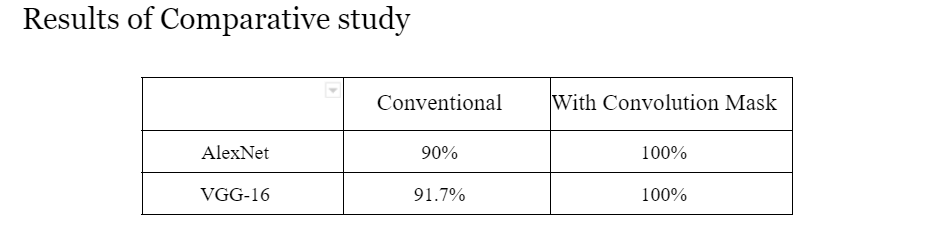

<p>
Due to the low computational resources available to us and the large amounts of time required to train the model, we have used pre-trained weights to showcase a fair comparison. Due to pretrained weights and the small size of the dataset, the models achieve extremely high accuracies, possibly due to overfitting by the Convolution Mask layers. The presence of dropout layers did not prevent overfitting.The higher accuracies show that the modified loss function and augmented back propagation increase interpretability in CNNs, which is also evident from the visualisations.
</p>

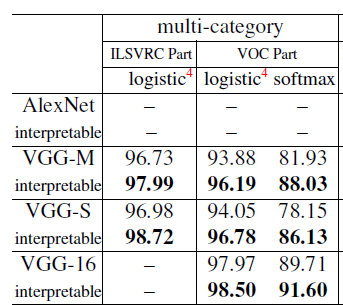

<p> 
The increase in accuracy for the interpretable models is inline with the results obtained in the paper as shown above for the dataset they tested in the paper.



#Visualizing the layers
Reference :https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/

##Alexnet

In [ ]:
!gdown 1AD045dL_580WM1KtKC01eECfHmml6-bj

Downloading...
From: https://drive.google.com/uc?id=1AD045dL_580WM1KtKC01eECfHmml6-bj
To: /content/alex
100% 228M/228M [00:03<00:00, 57.5MB/s]


In [ ]:
model = torch.load('/content/alex')

In [ ]:
model_weights = [] # save the conv layer weights in this list
conv_layers = [] 
# get all the model children as list
model_children = list(model.modules())

In [ ]:
# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 5


In [ ]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)) ====> SHAPE: torch.Size([64, 3, 11, 11])
CONV: Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([192, 64, 5, 5])
CONV: Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 192, 3, 3])
CONV: Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 384, 3, 3])
CONV: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 256, 3, 3])


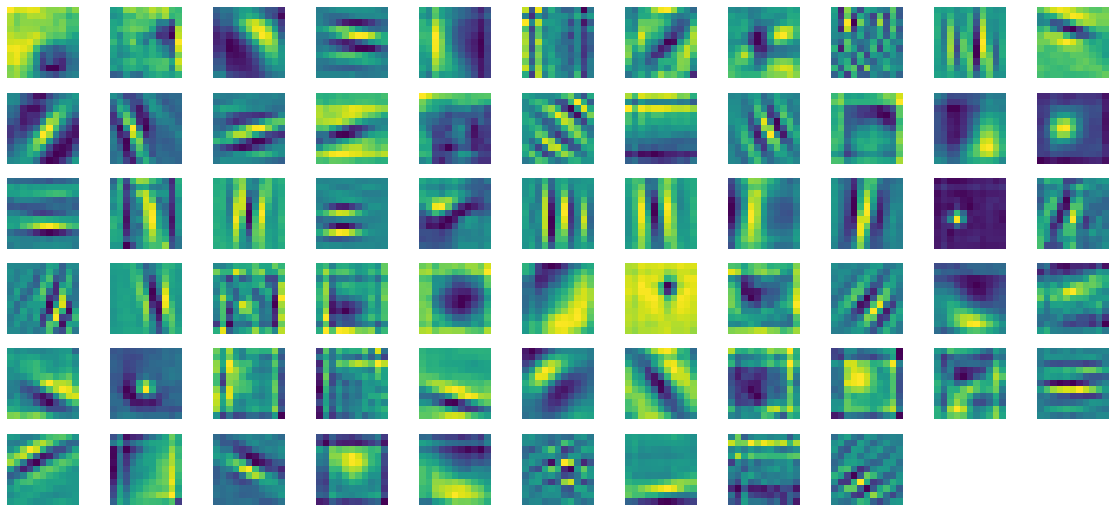

In [ ]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(11, 11, i+1) # (11, 11) because in conv0 we have 11*11 filters
    plt.imshow(filter[0, :, :].detach().cpu(),)
    plt.axis('off')
    plt.savefig('./outputs/filter.png')
plt.show()

These filters are used to visualise the feature maps.

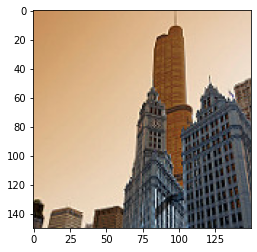

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [ ]:
# read and visualize an image
img = cv.imread('./train-scene classification/train/1337.jpg')
plt.imshow(img)
plt.show()
img = np.array(img)
# apply the transforms
img = transform_img(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
img = img.to(device)
print(img.size())

In [ ]:
# pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

torch.Size([64, 55, 55])
Saving layer 0 feature maps...


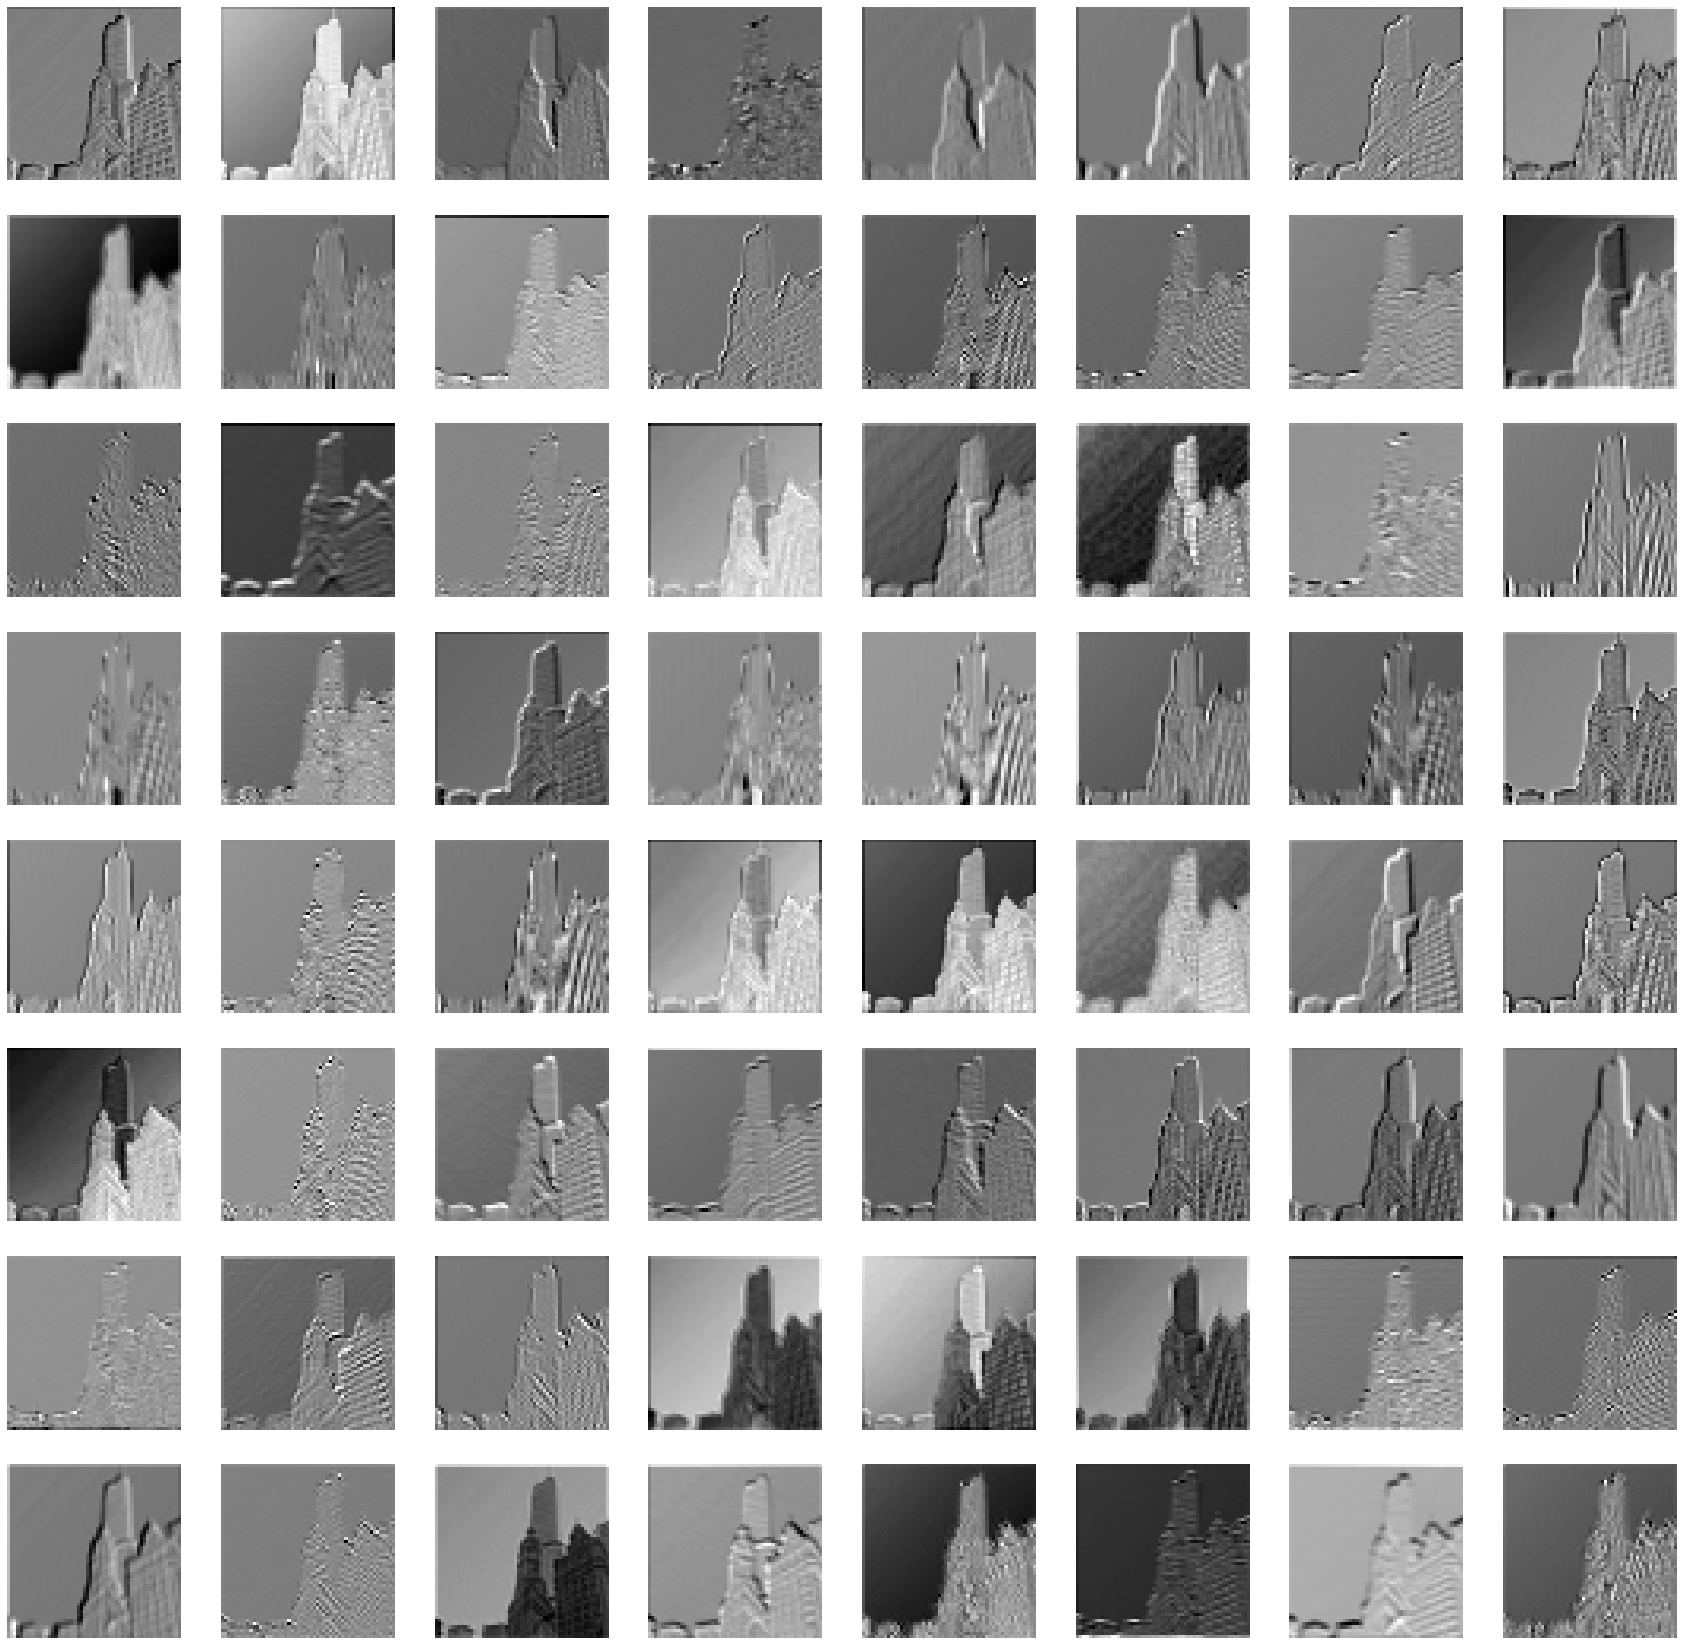

torch.Size([192, 55, 55])
Saving layer 1 feature maps...


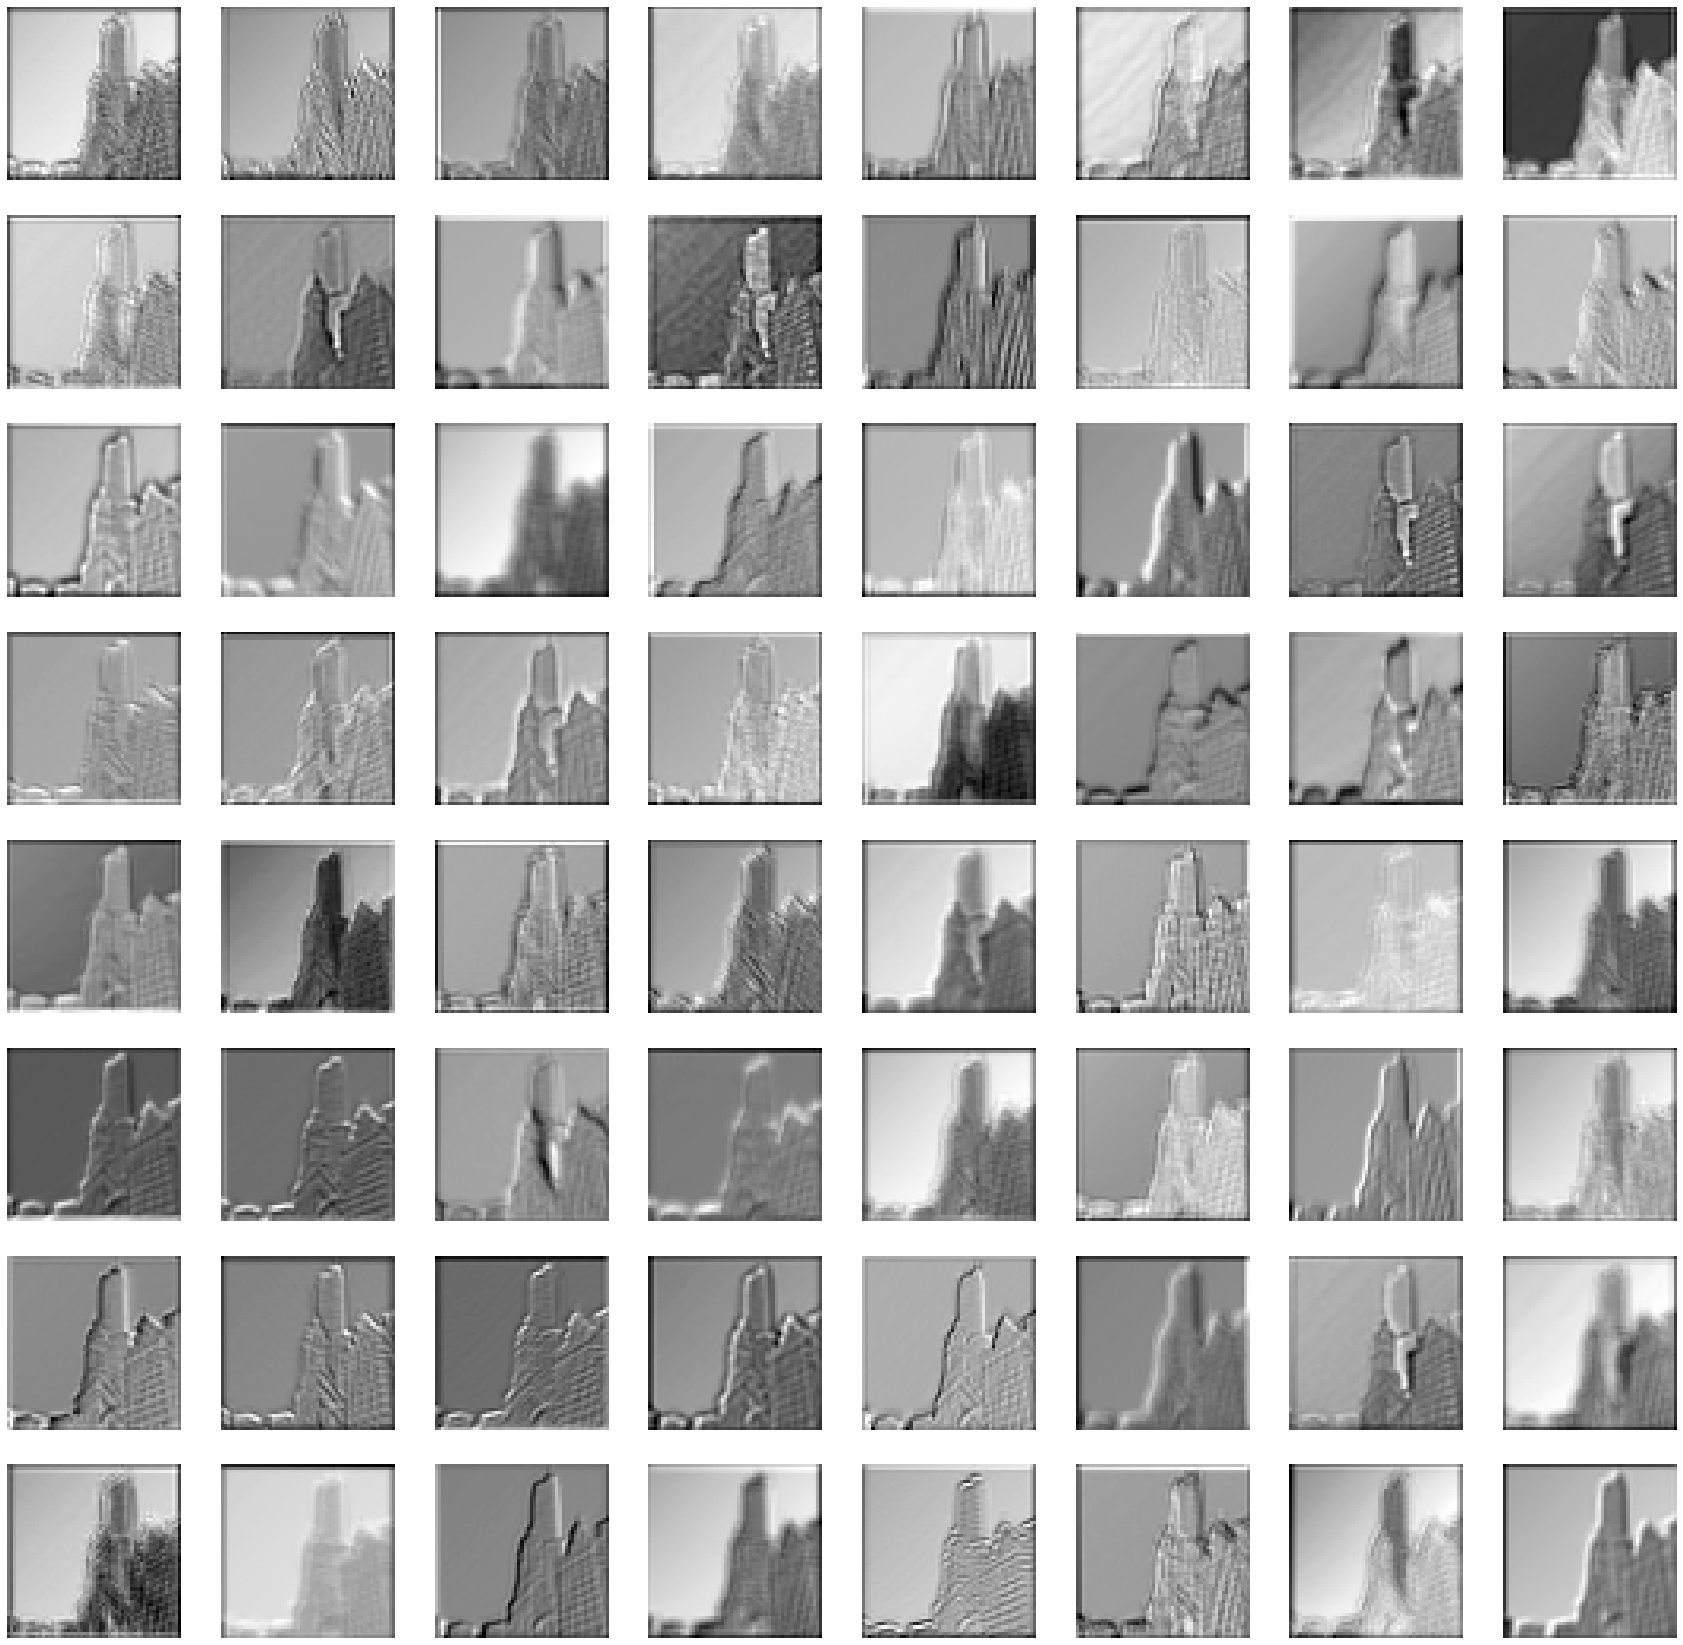

torch.Size([384, 55, 55])
Saving layer 2 feature maps...


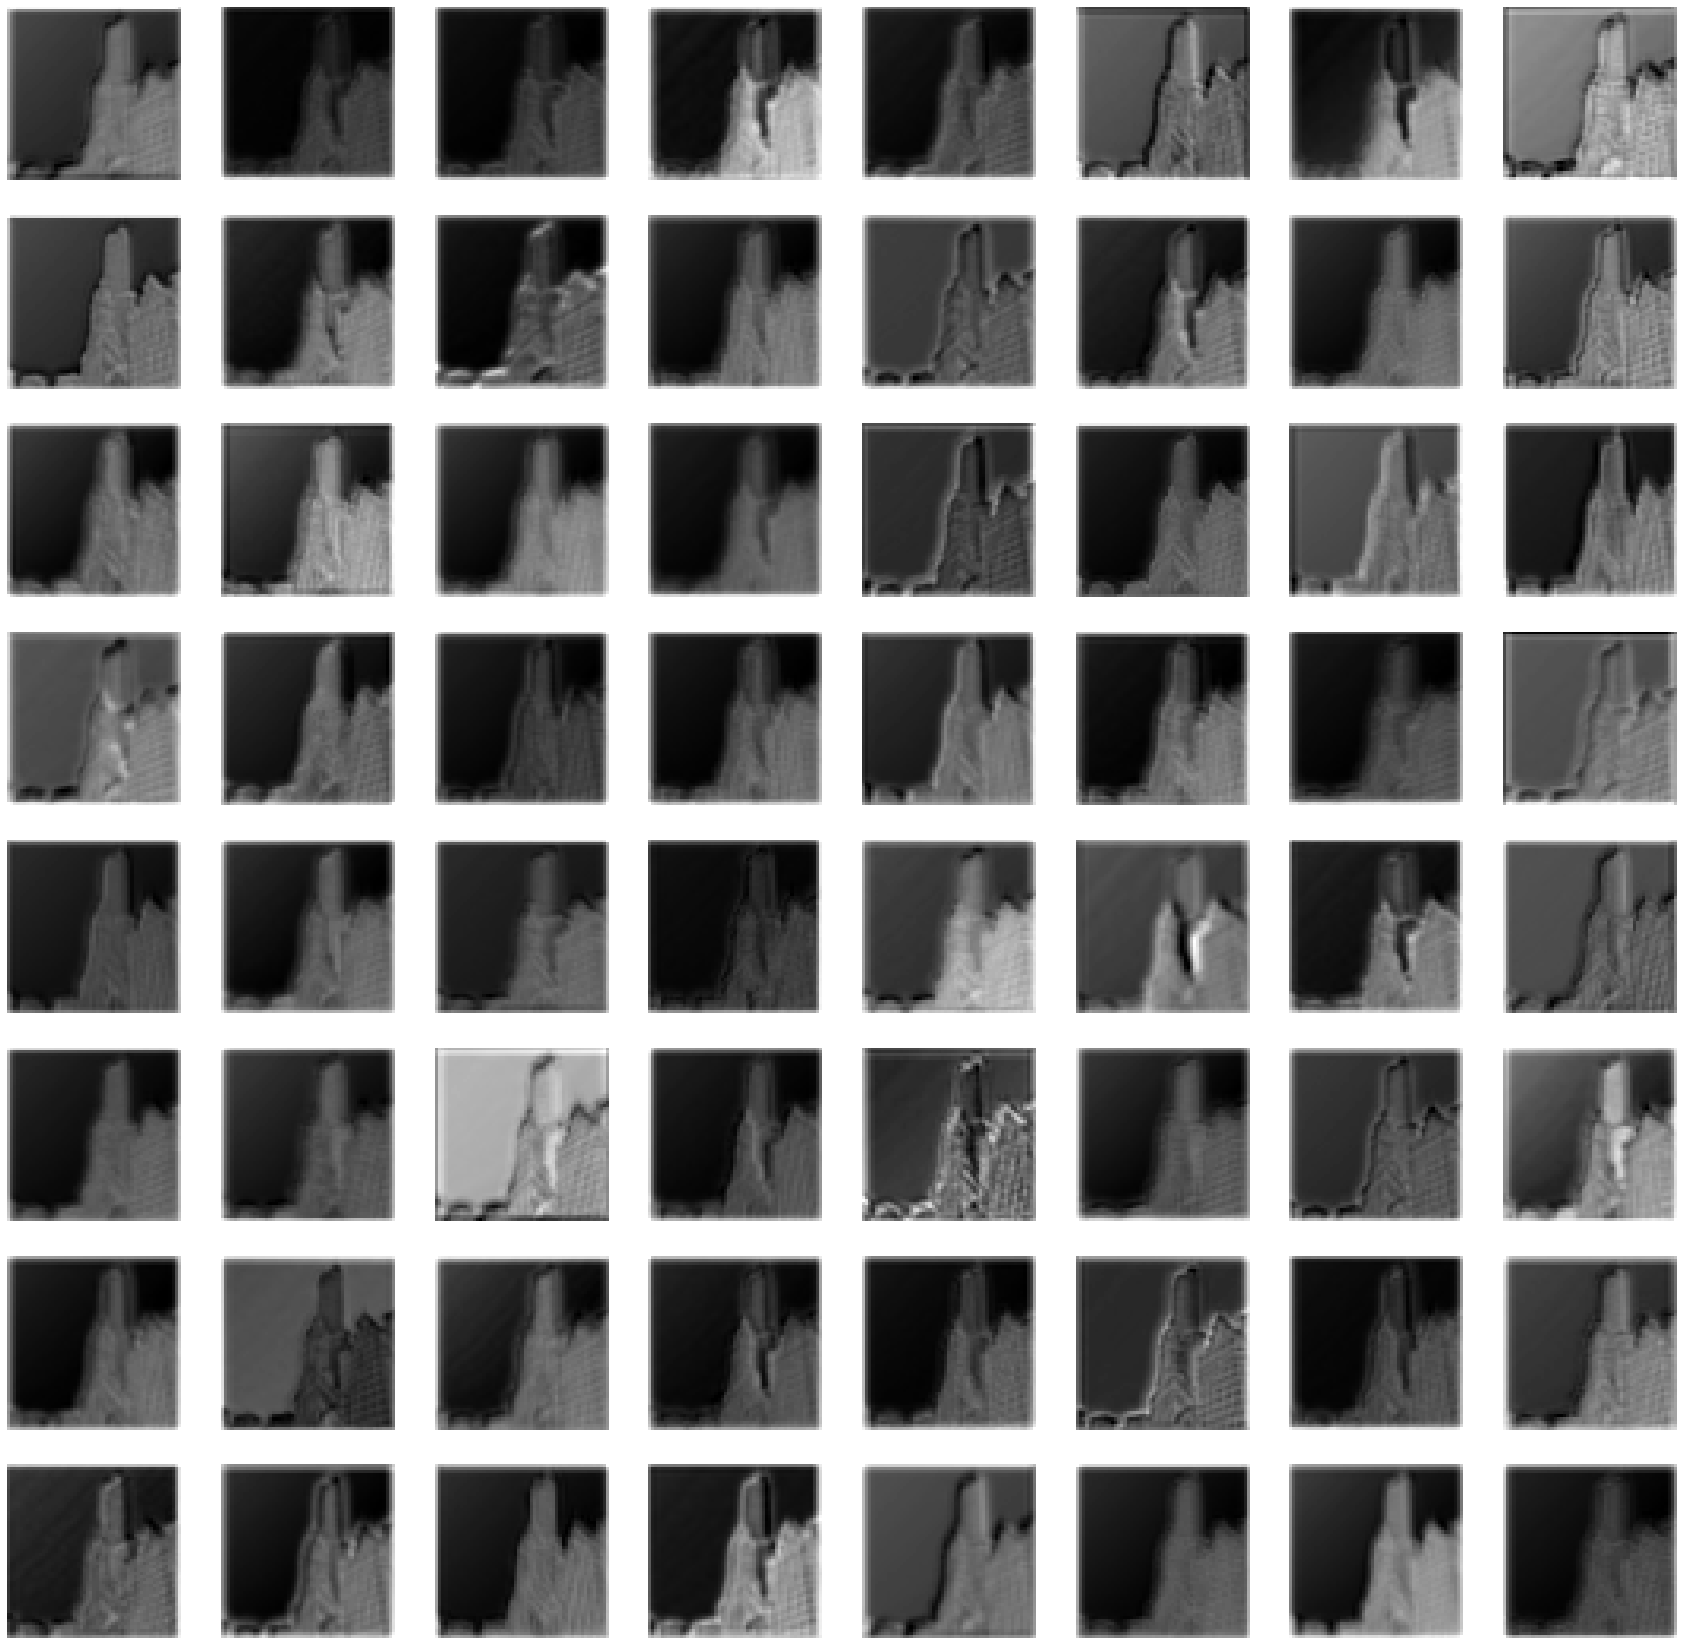

torch.Size([256, 55, 55])
Saving layer 3 feature maps...


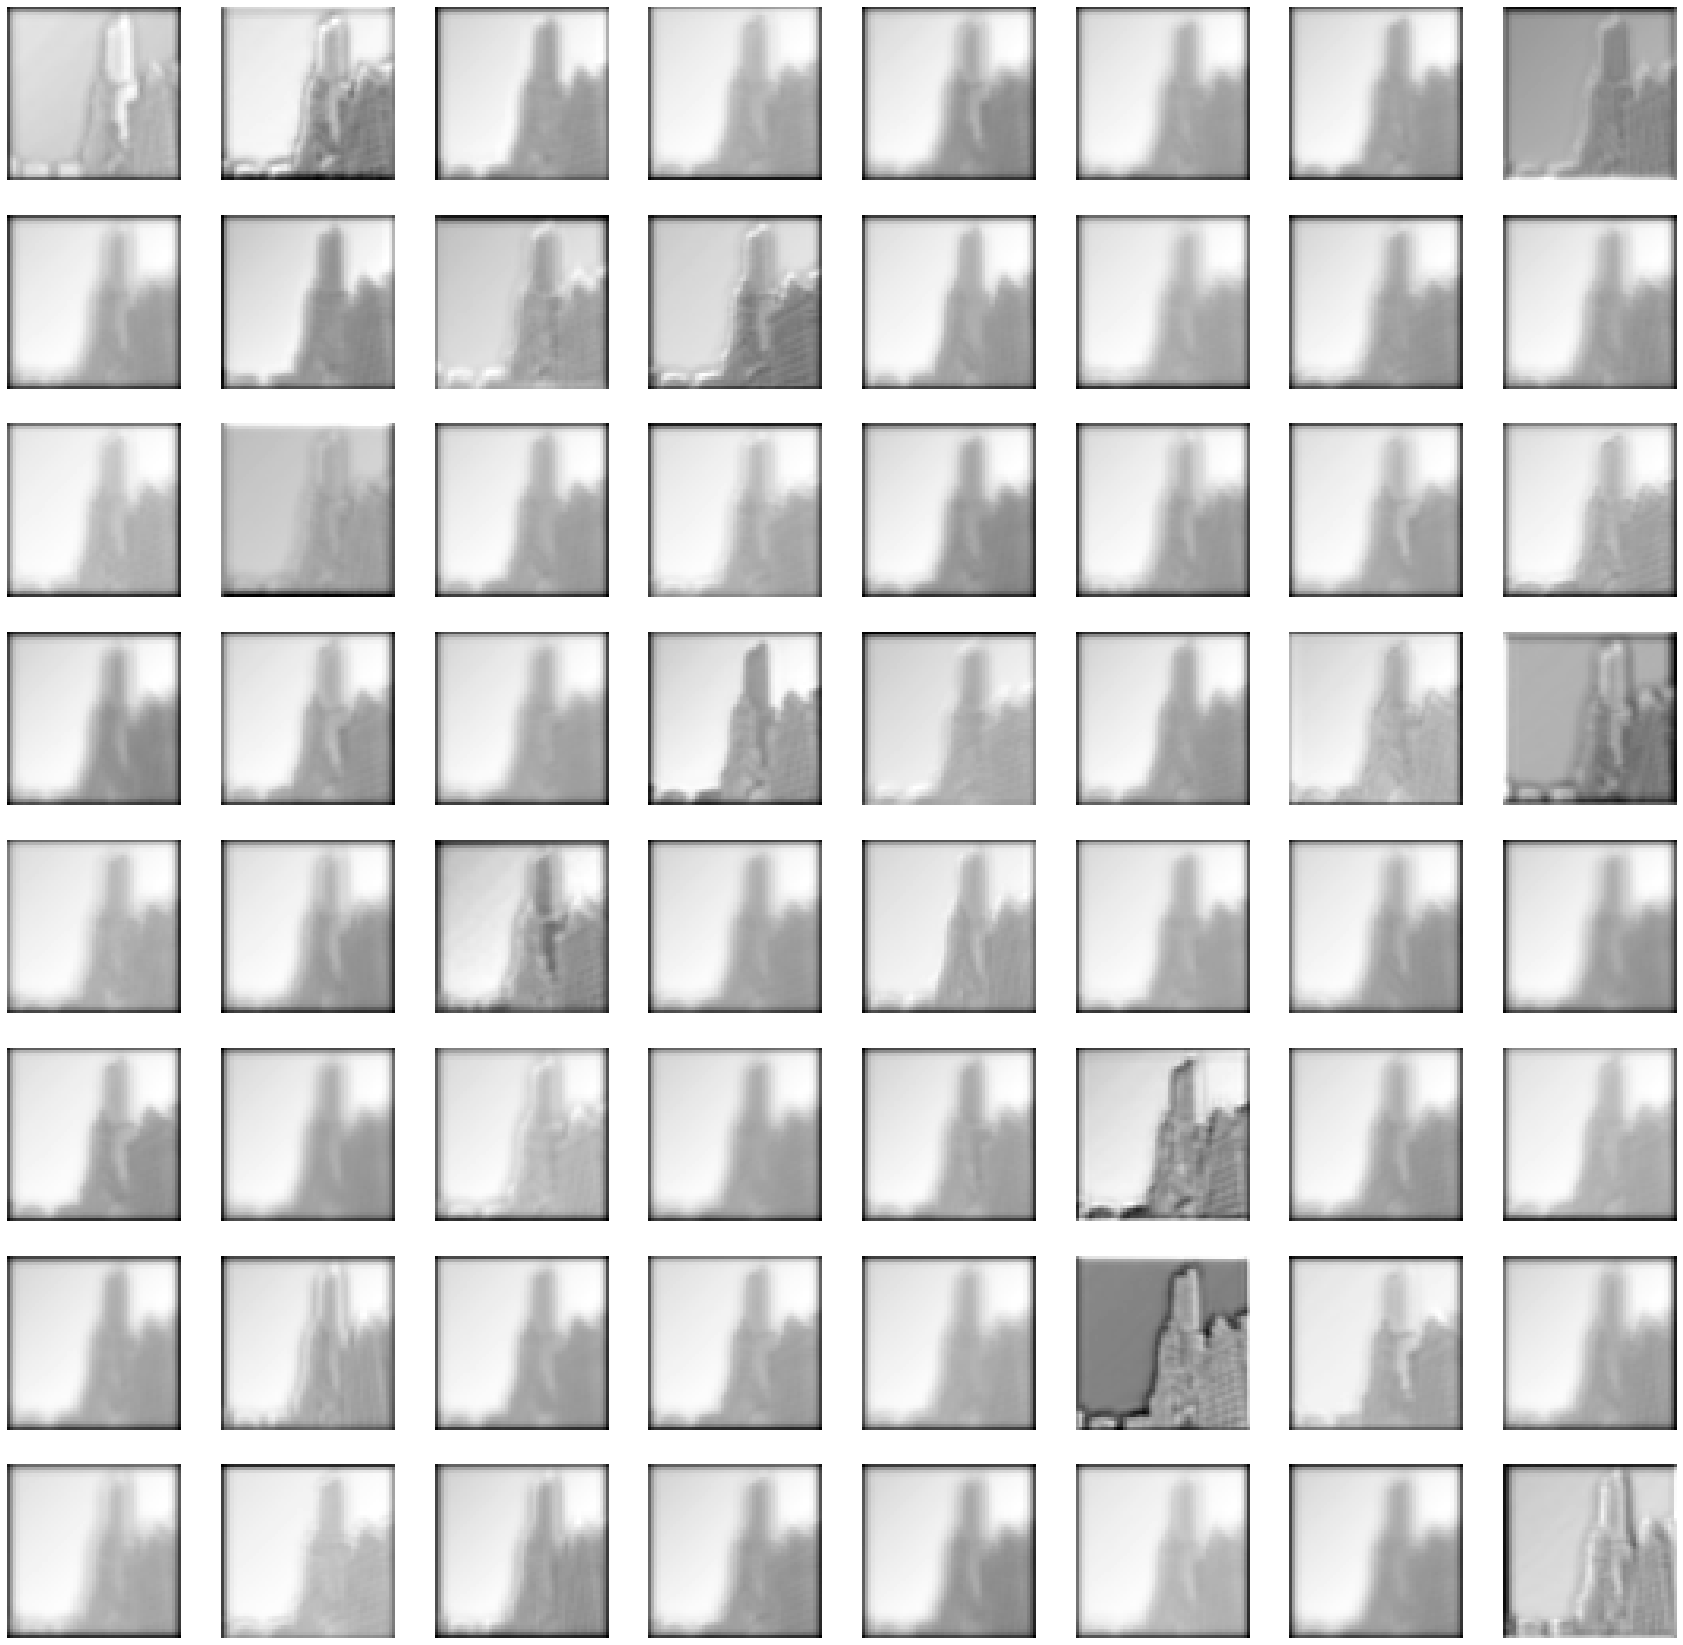

torch.Size([256, 55, 55])
Saving layer 4 feature maps...


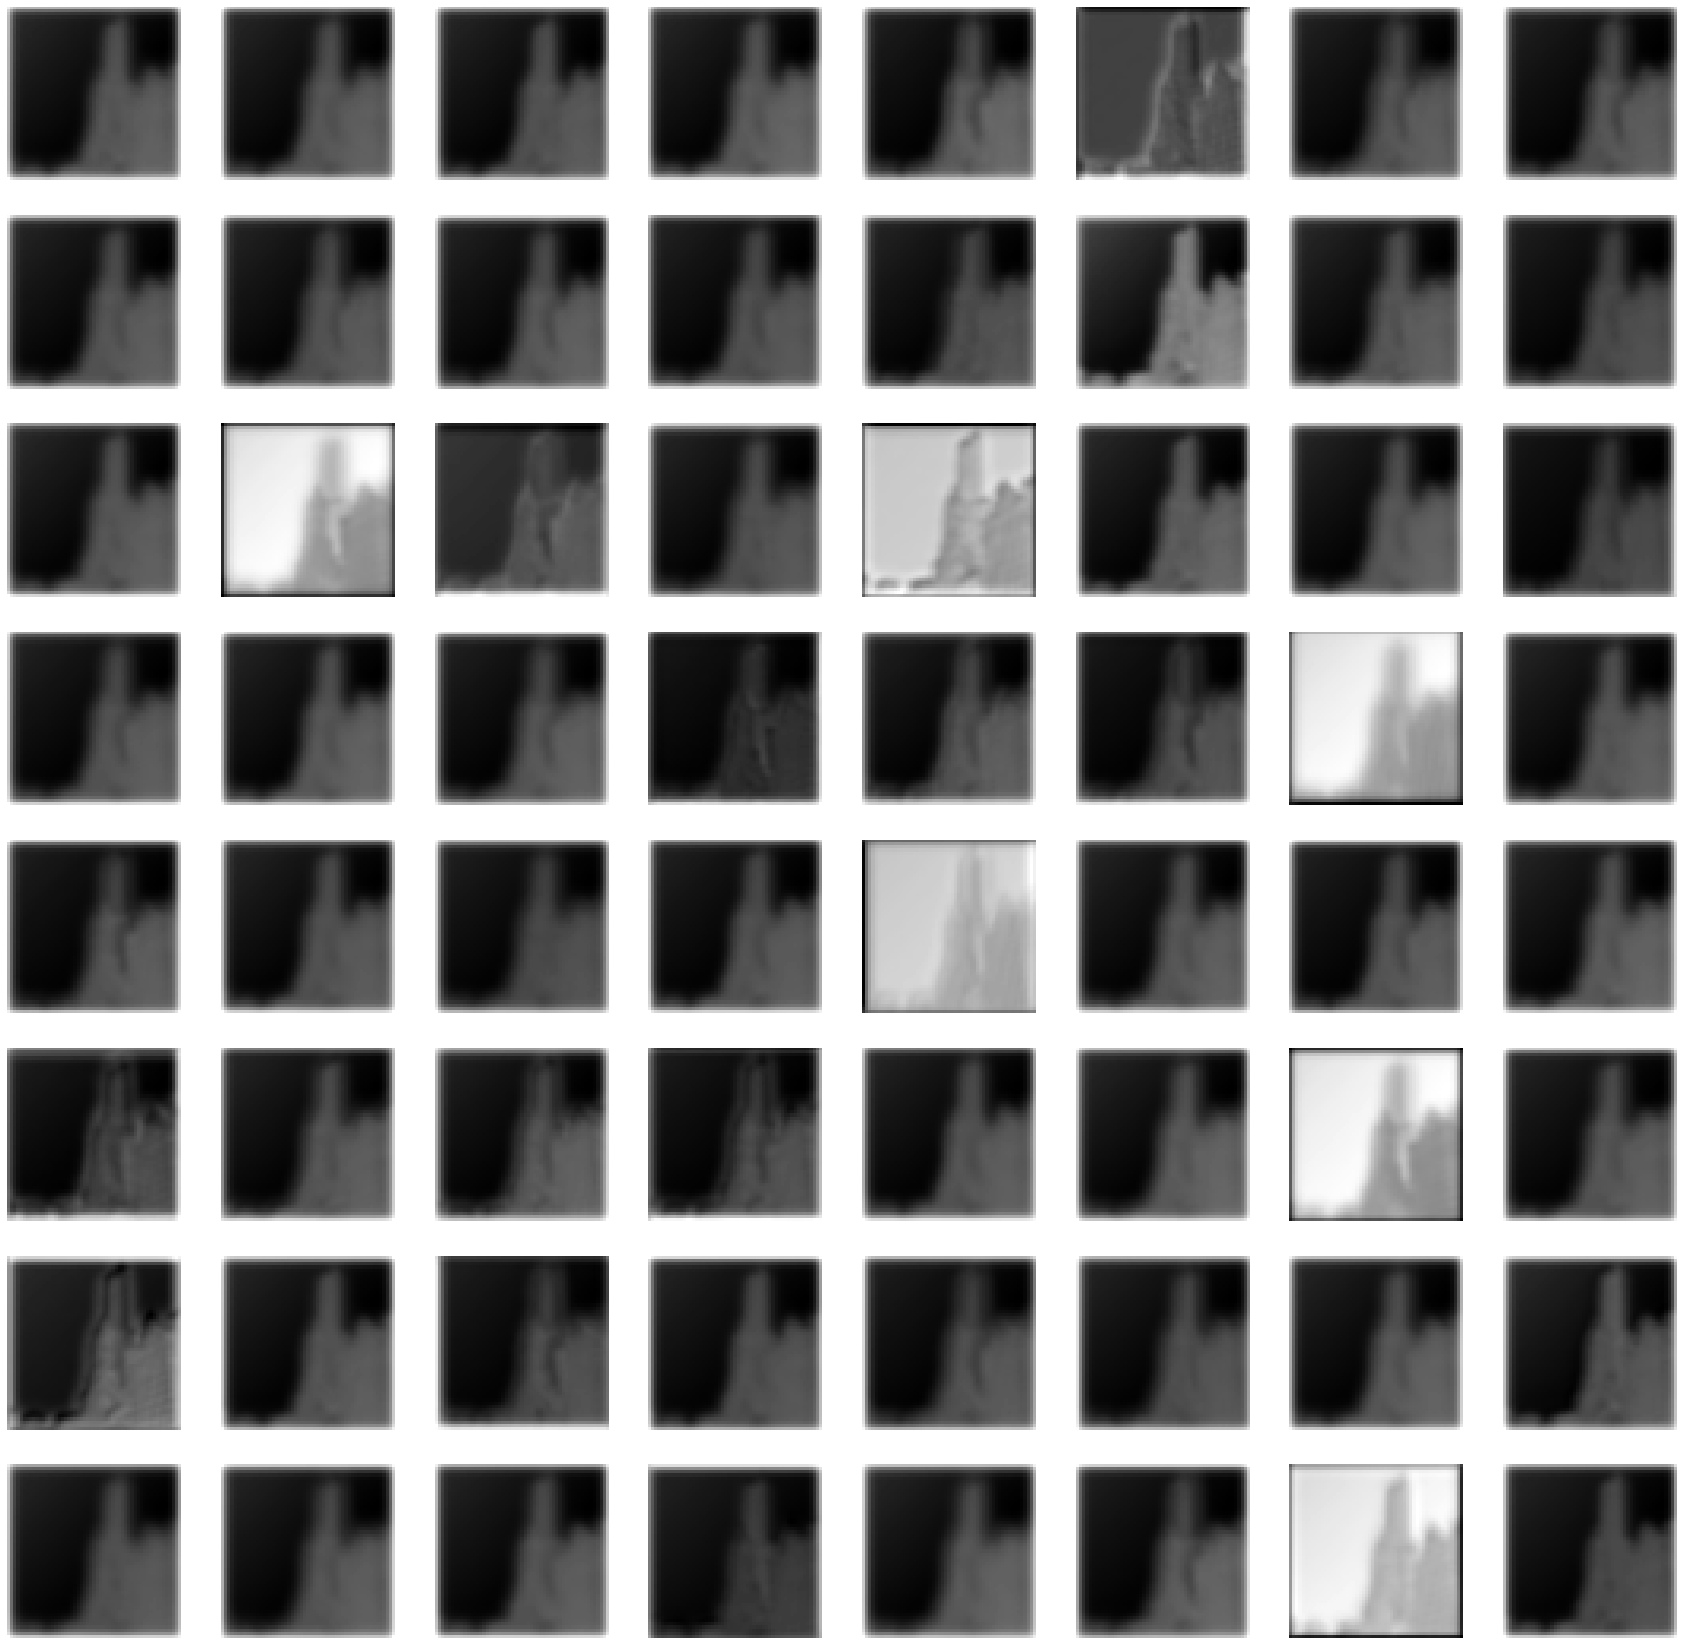

In [ ]:
# visualize features from each layer 
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"./outputs/layer_{num_layer}.png")
    plt.show()
    plt.close()

##Interpretable Alexnet

In [ ]:
!gdown 1AQXL1l2e6LX4dCaPO3eYlBZV9sNPKjfP

Downloading...
From: https://drive.google.com/uc?id=1AQXL1l2e6LX4dCaPO3eYlBZV9sNPKjfP
To: /content/alex-inter
100% 236M/236M [00:01<00:00, 163MB/s]


In [ ]:
model = torch.load('/content/alex-inter')

In [ ]:
model_weights = [] # save the conv layer weights in this list
conv_layers = [] 
# get all the model children as list
model_children = list(model.modules())

In [ ]:
# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
    if(counter == 5):
      break
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 5


In [ ]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4)) ====> SHAPE: torch.Size([96, 3, 11, 11])
CONV: Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([256, 96, 5, 5])
CONV: Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 256, 3, 3])
CONV: Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 384, 3, 3])
CONV: Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 384, 3, 3])


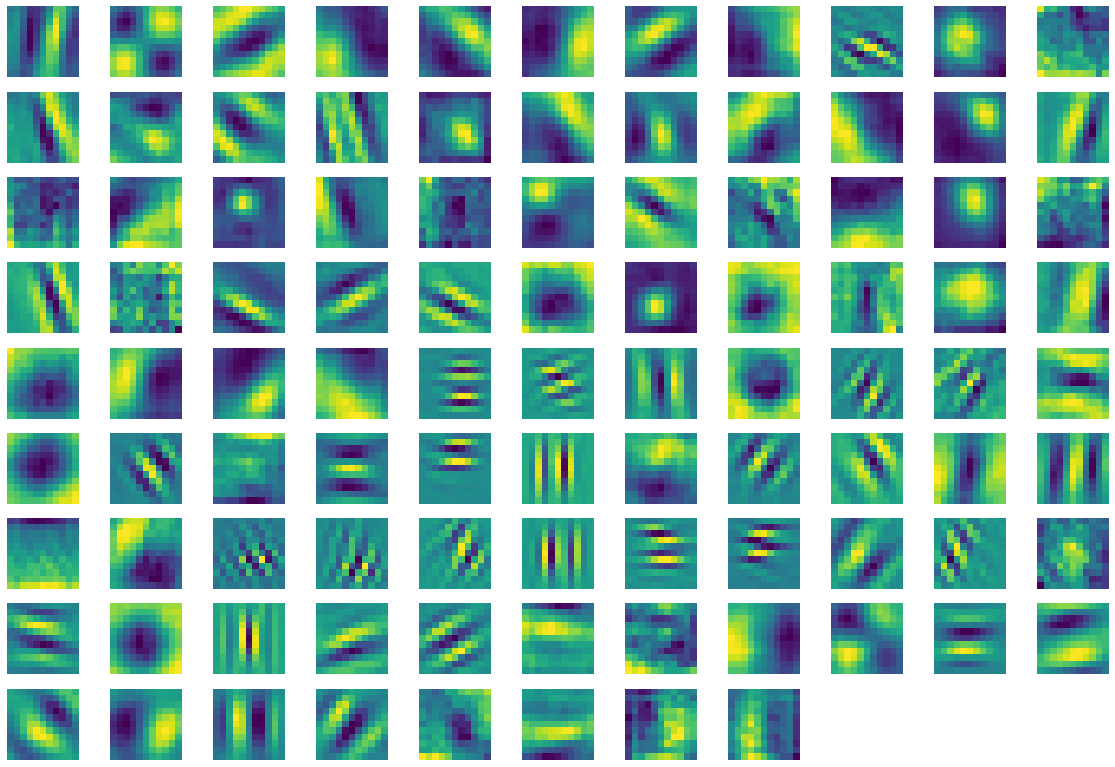

In [ ]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(11, 11, i+1) # (11, 11) because in conv0 we have 11*11 filters
    plt.imshow(filter[0, :, :].detach().cpu(),)
    plt.axis('off')
    plt.savefig('./outputs/filter.png')
plt.show()

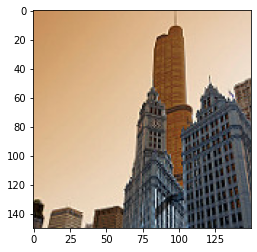

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [ ]:
# read and visualize an image
img = cv.imread('./train-scene classification/train/1337.jpg')
plt.imshow(img)
plt.show()
img = np.array(img)
# apply the transforms
img = transform_img(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
img = img.to(device)
print(img.size())

In [ ]:
# pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

torch.Size([96, 54, 54])
Saving layer 0 feature maps...


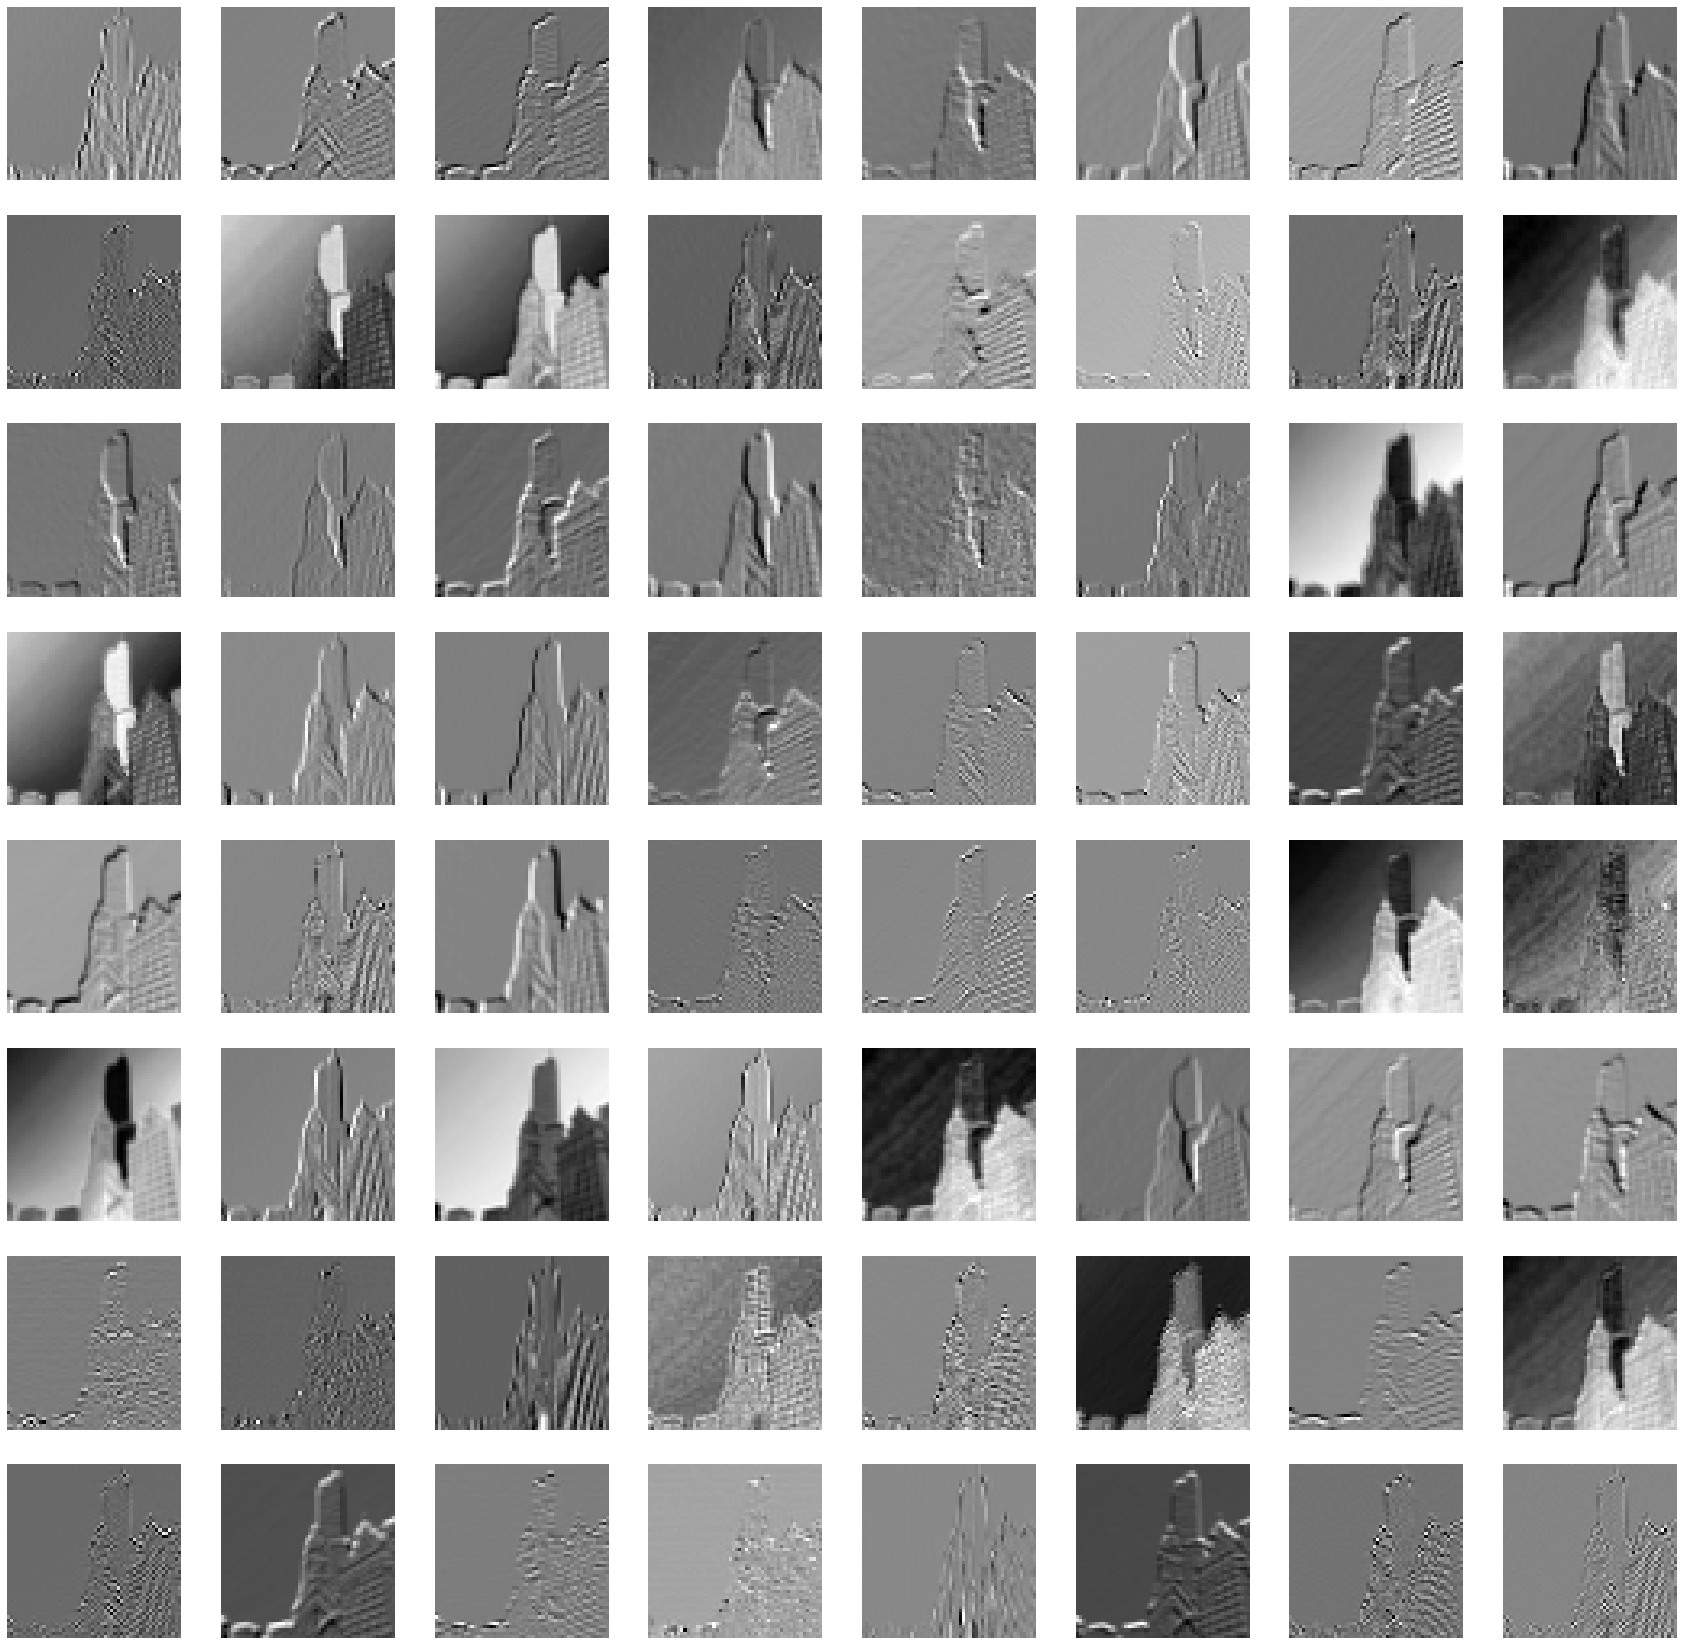

torch.Size([256, 54, 54])
Saving layer 1 feature maps...


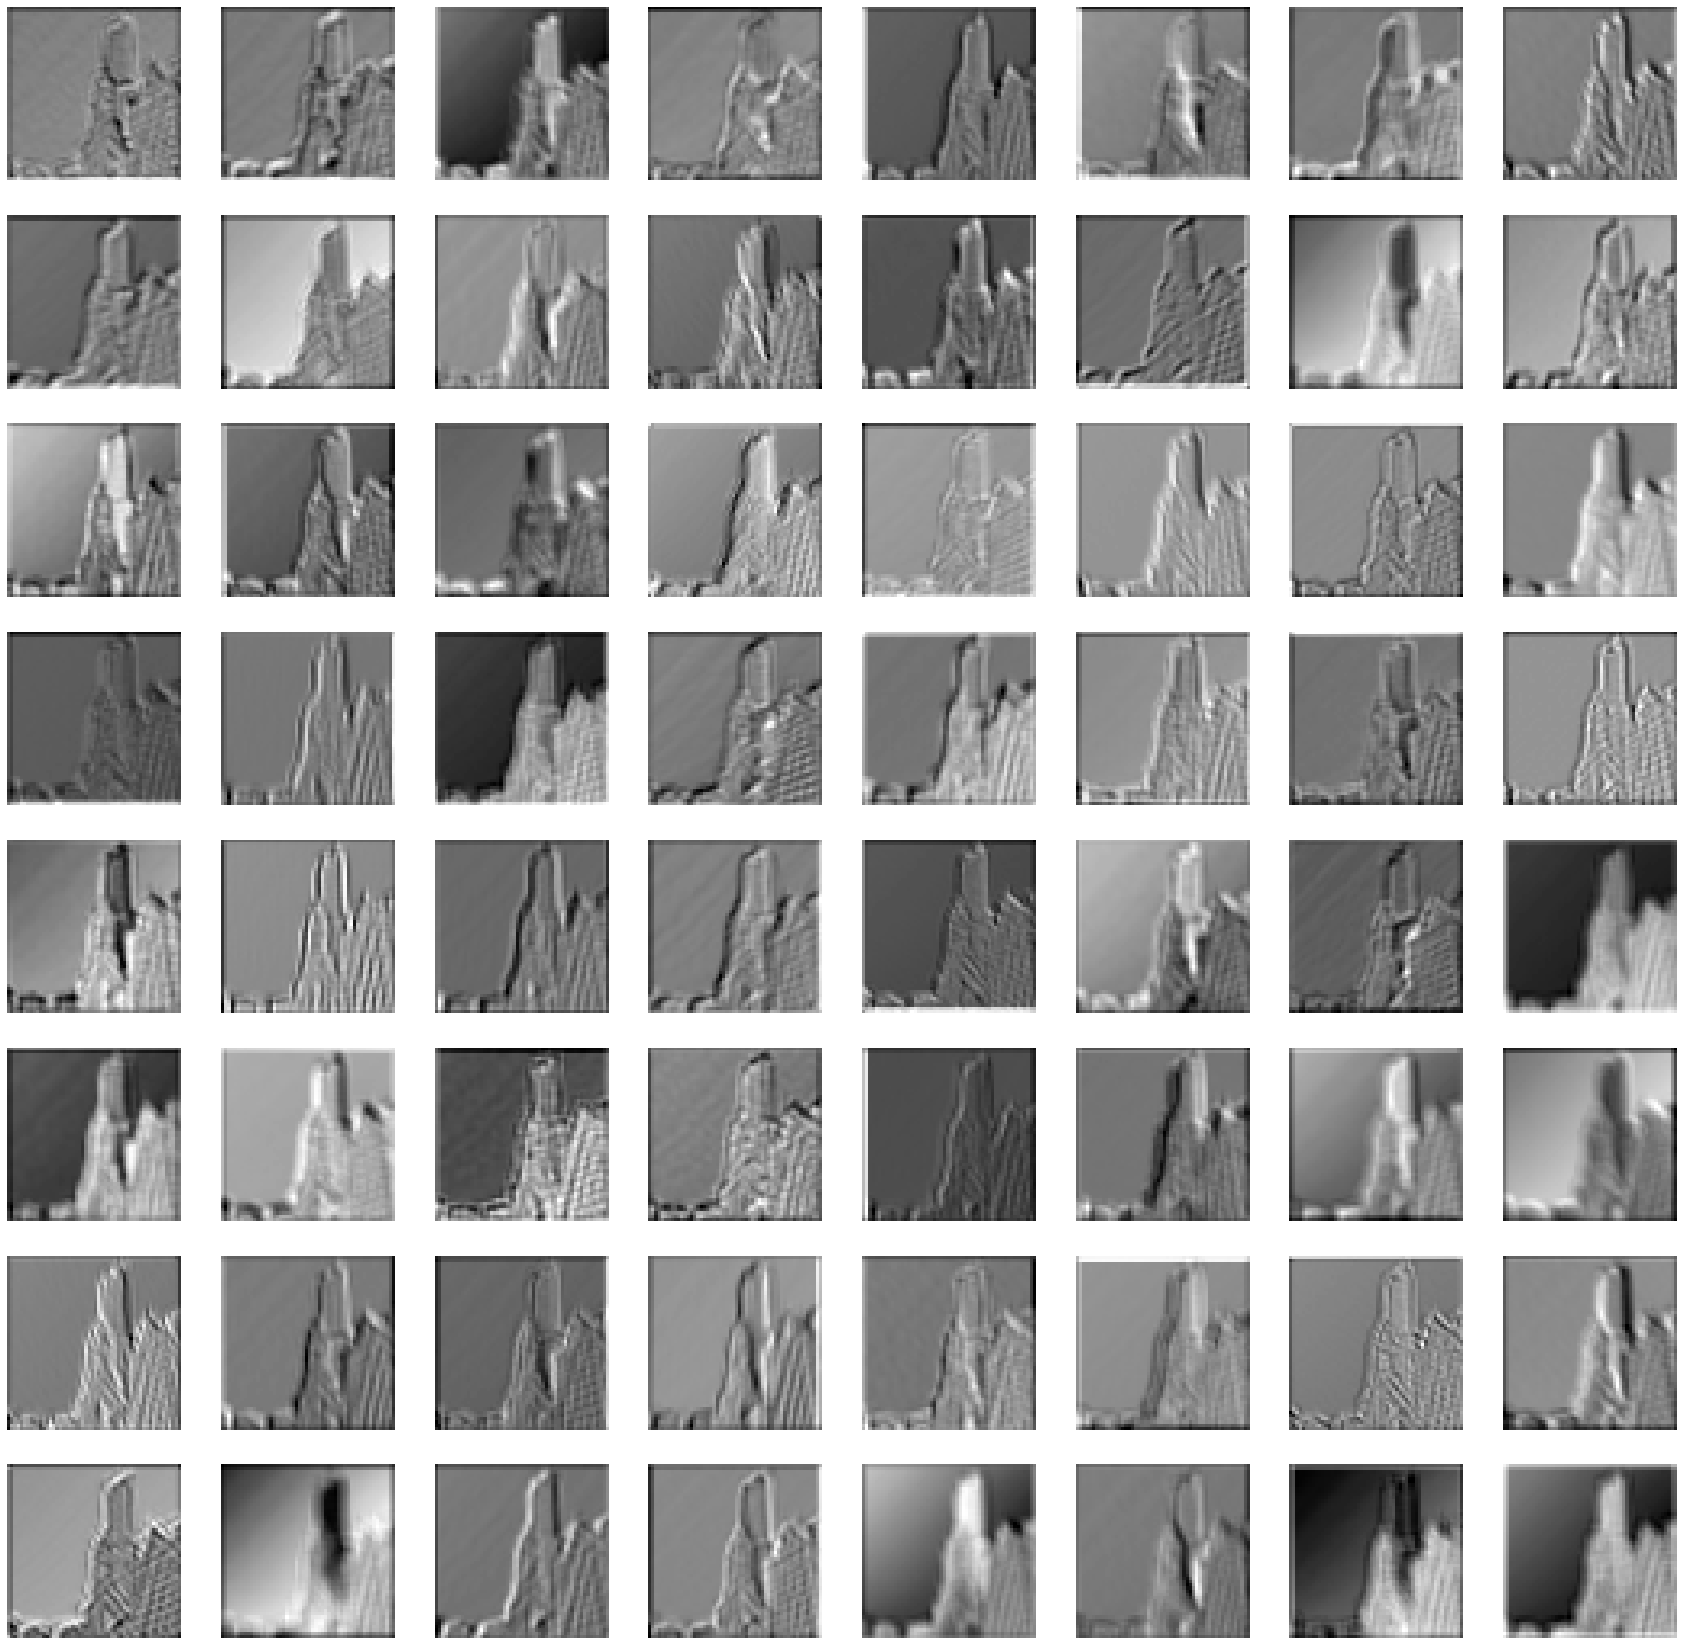

torch.Size([384, 54, 54])
Saving layer 2 feature maps...


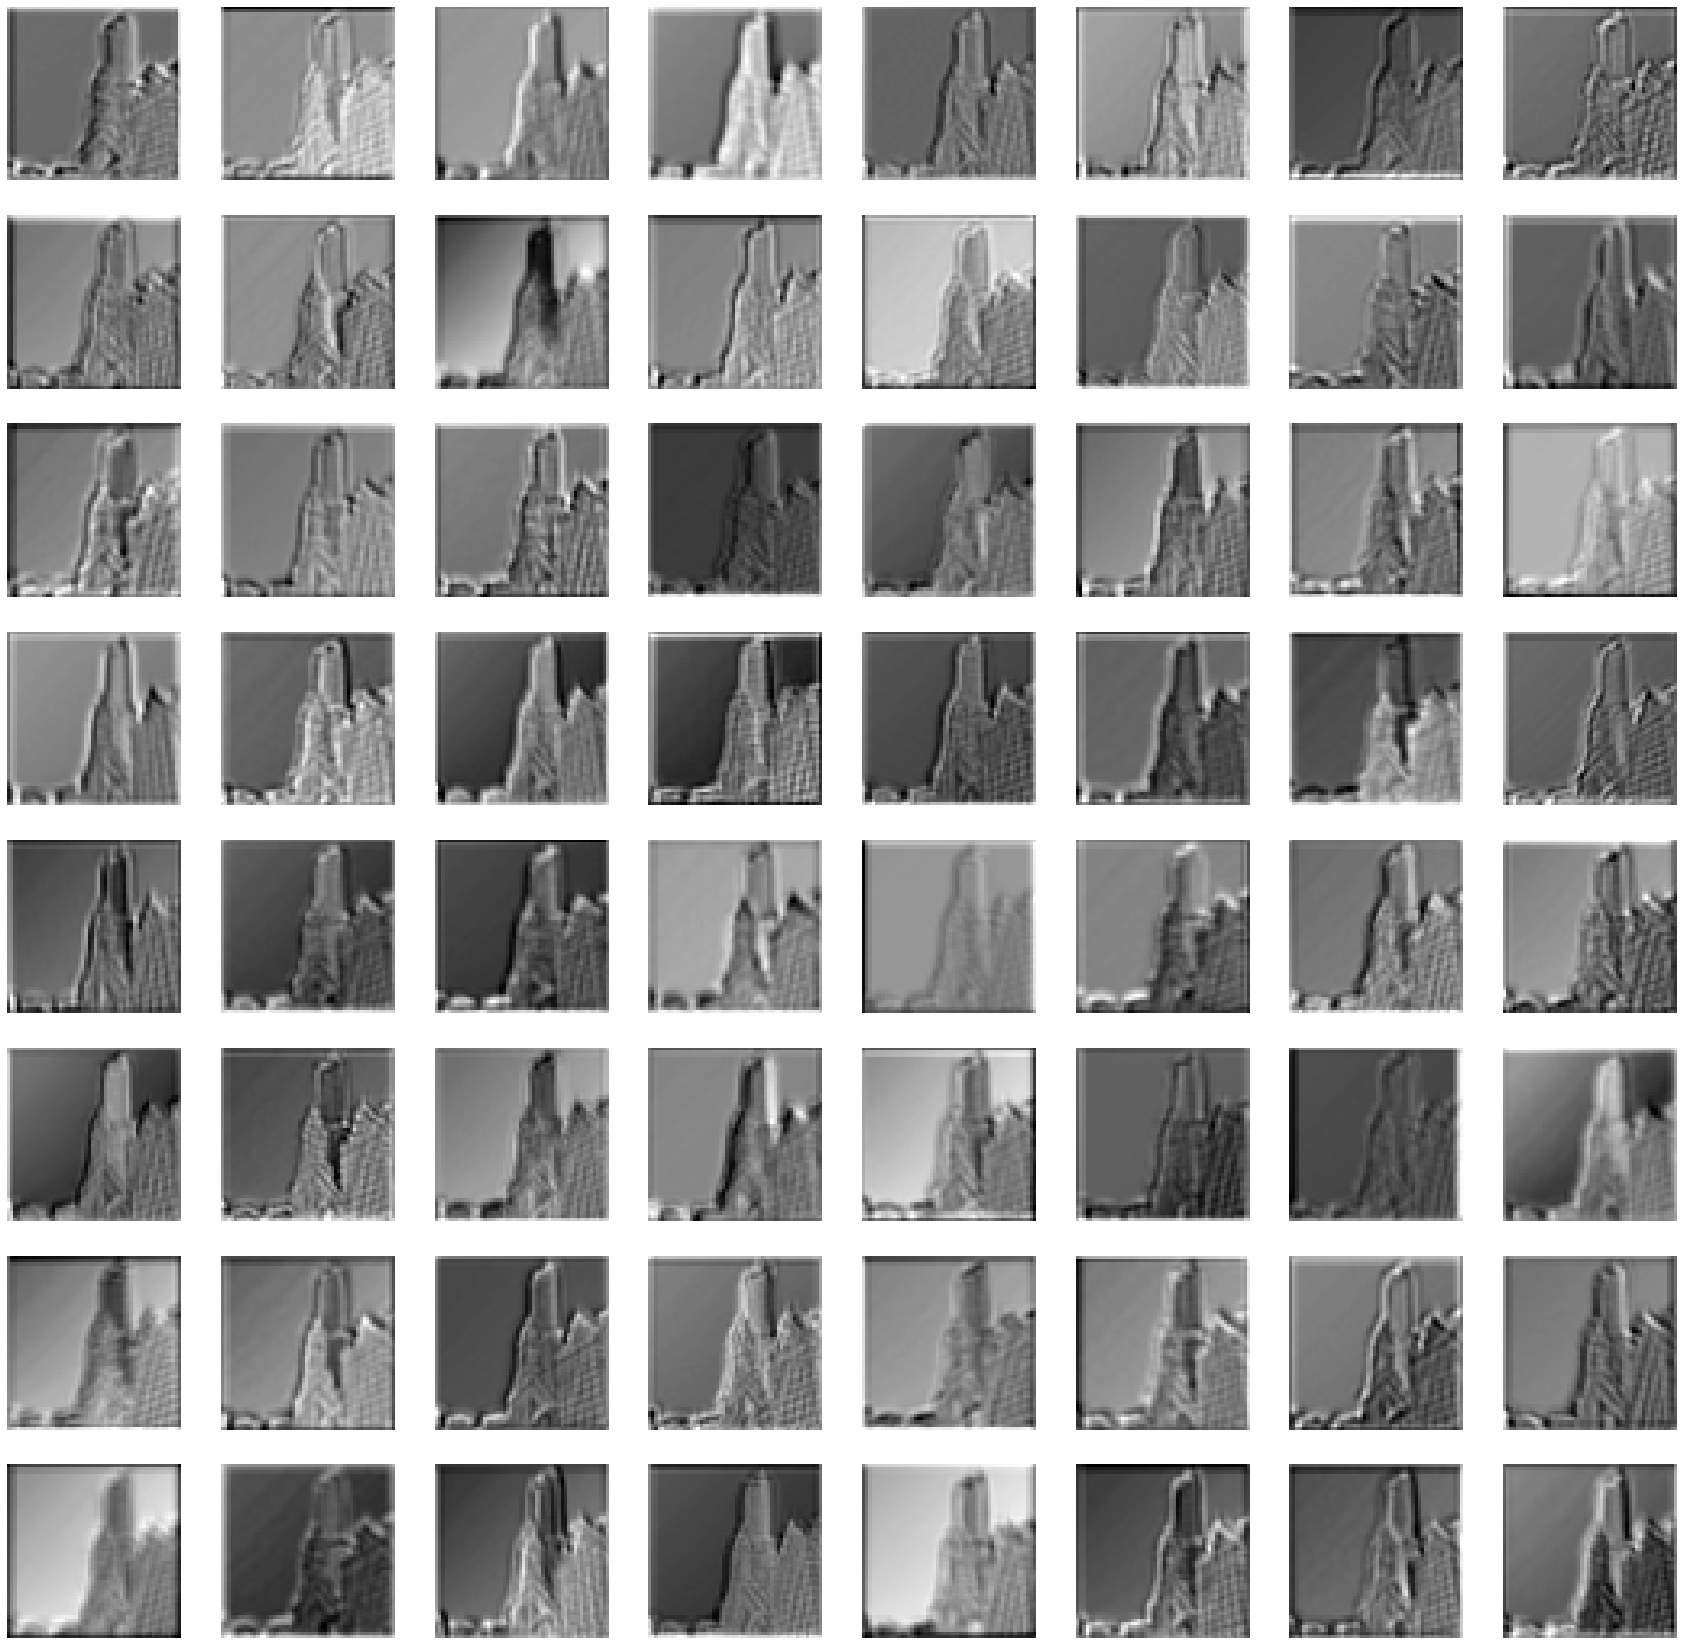

torch.Size([384, 54, 54])
Saving layer 3 feature maps...


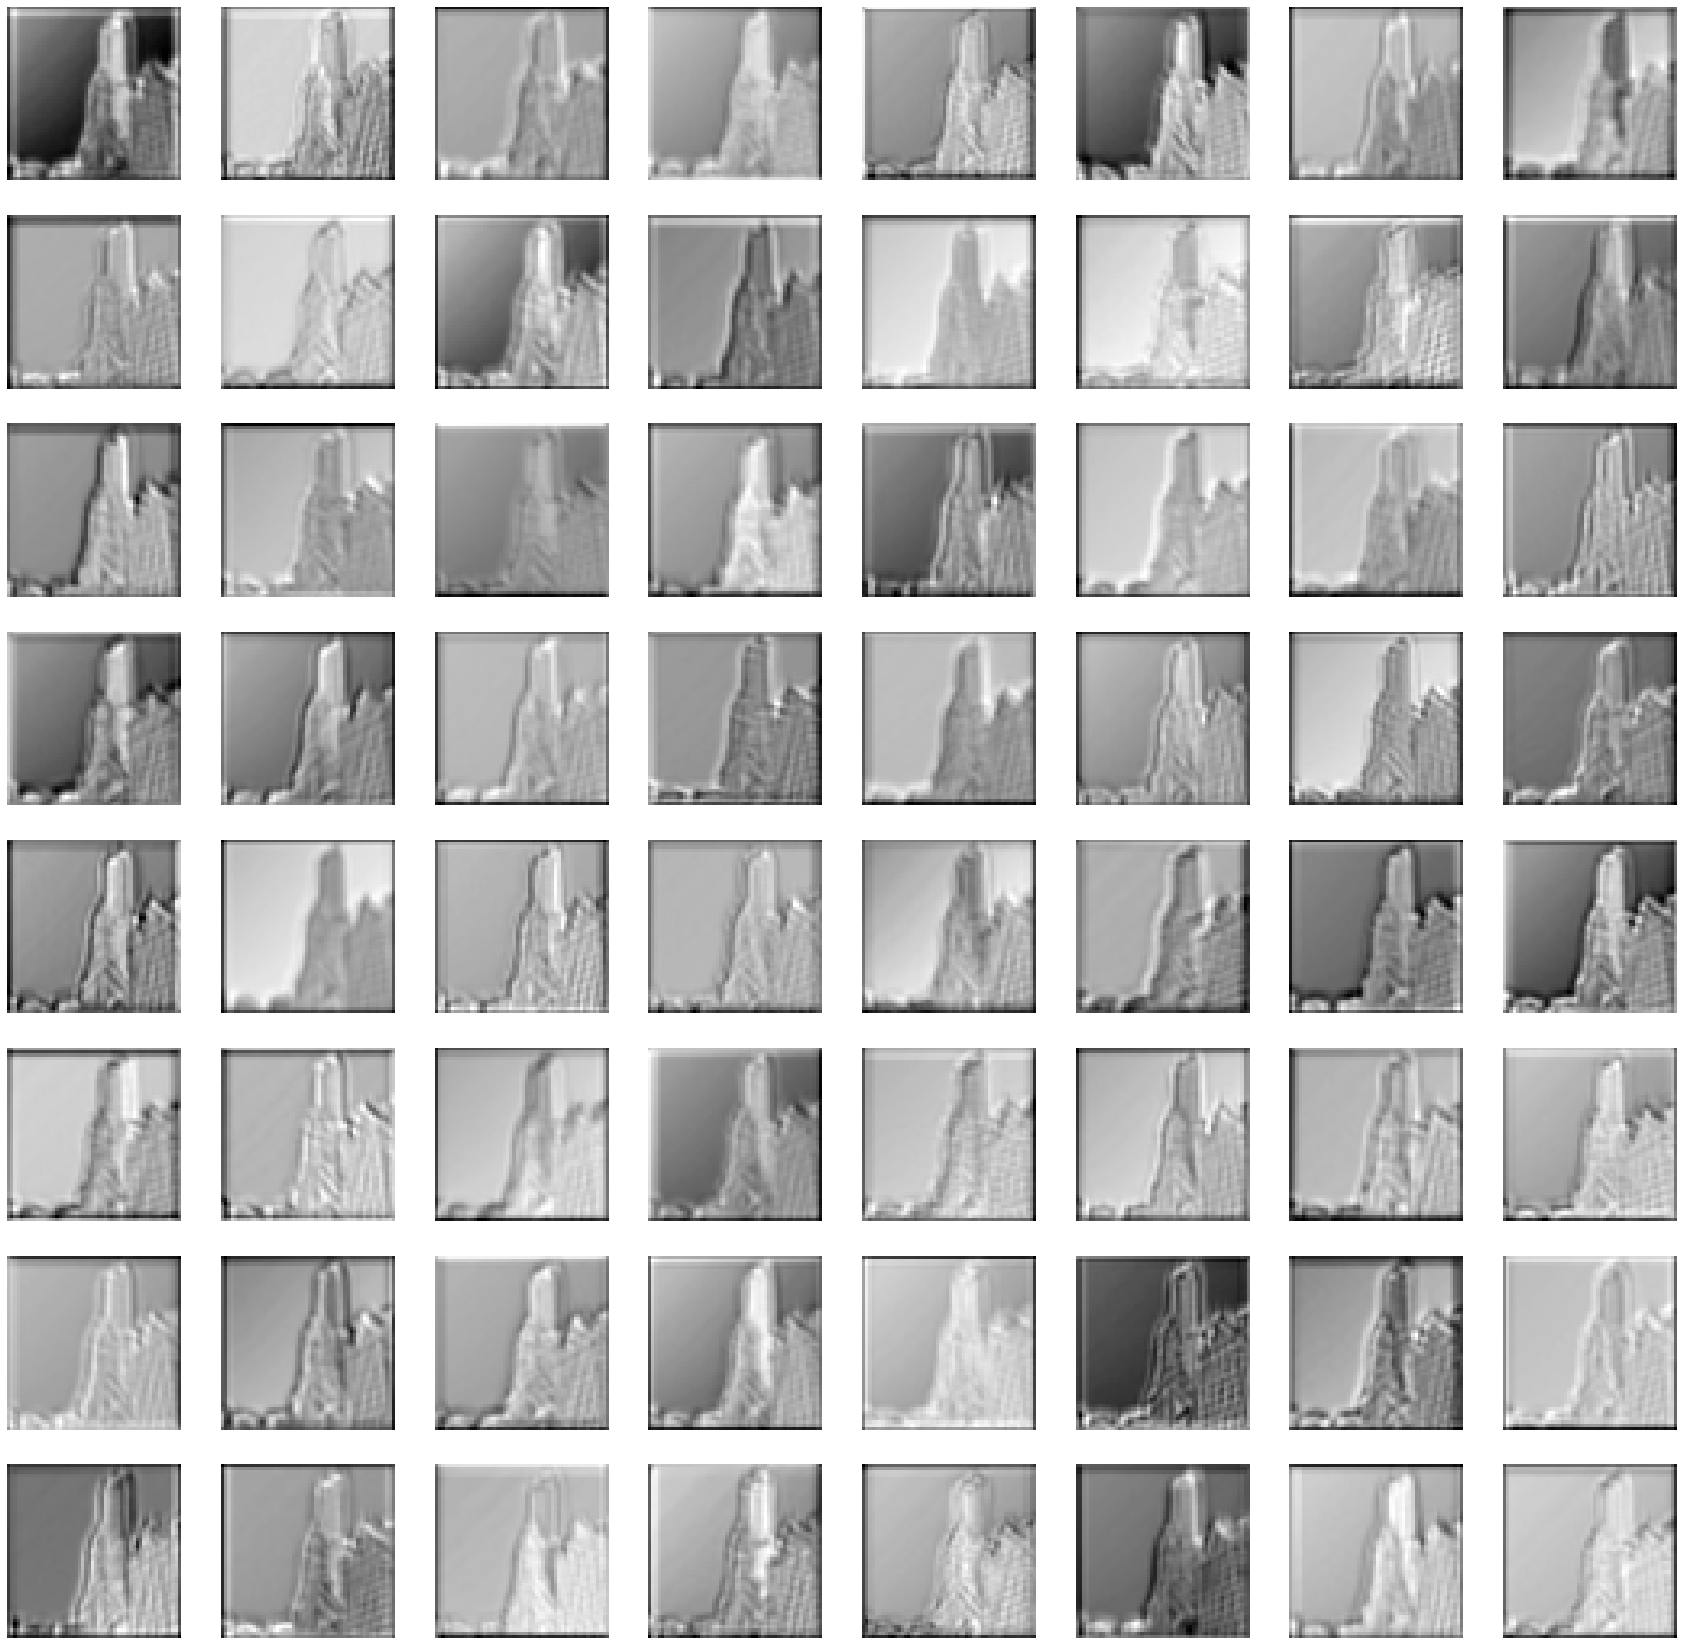

torch.Size([256, 54, 54])
Saving layer 4 feature maps...


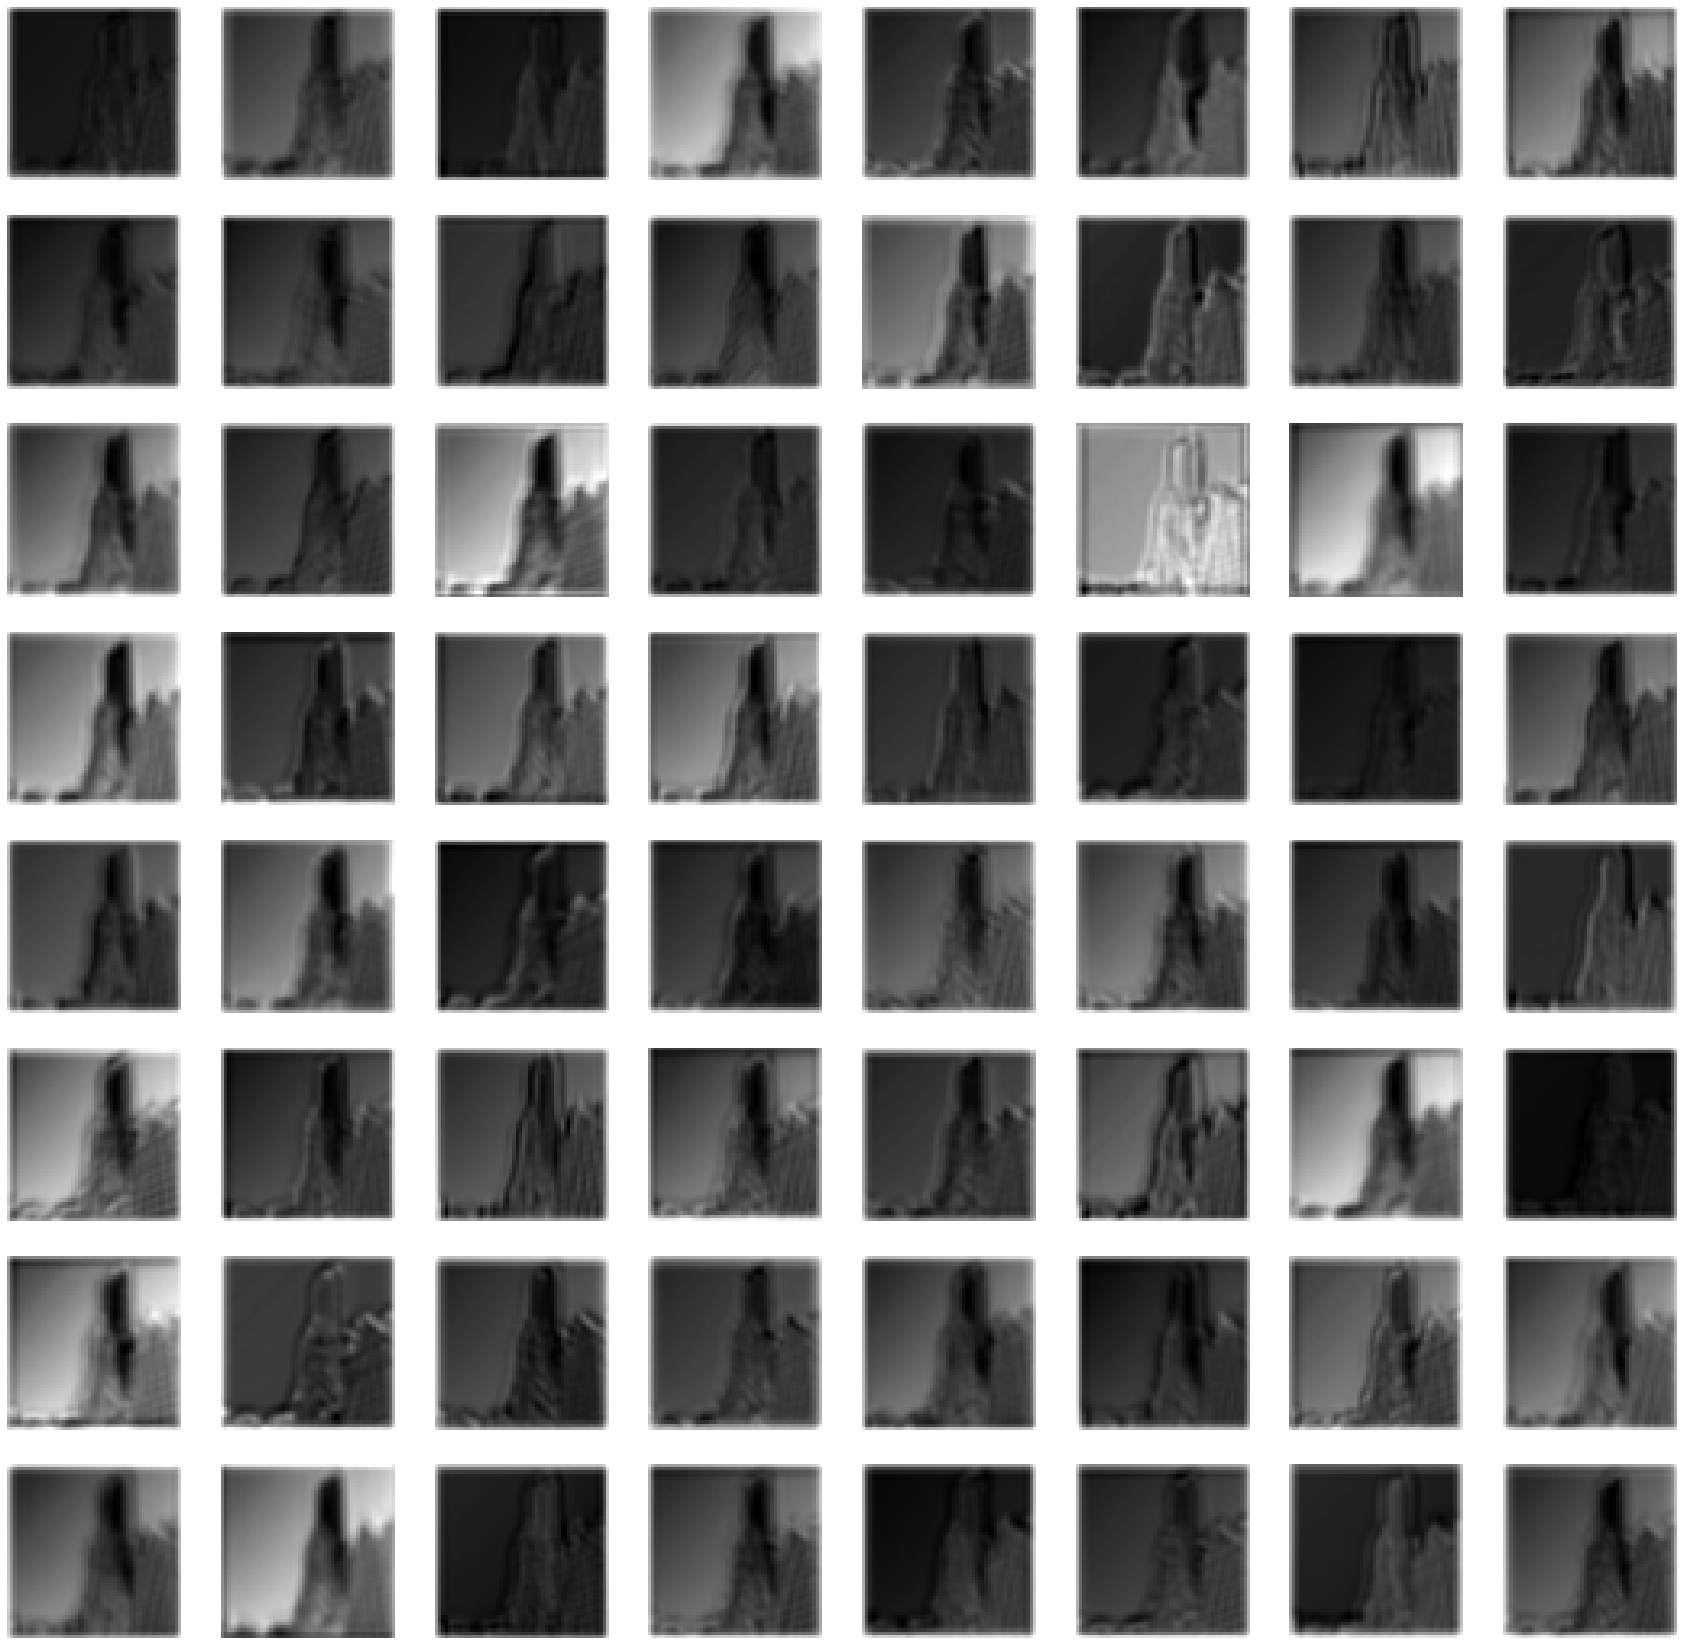

In [ ]:
# visualize features from each layer 
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.savefig(f"./outputs/layer_{num_layer}.png")
    plt.show()
    plt.close()

In the higher layers, it can be observed that for vanilla Alexnet no specific feature is being represented in the visualisations for the classic CNN. Through the use of interpretable layers, it can be seen that more specific features are blocked and highlighted, Thus showing how the Conv Mask layer is being used to improve Interpretability in Interpretable CNN.

#Conclusion
<p>
In this notebook, we have demonstrated how Human Interpretable CNN's can be created by simply Introducing Convolutional Mask Layers and not requiring any external annotations. The results obtained have generalized well since we have used a non-standard dataset. It has also been tested on multiple architectures like AlexNet and VGG-16.
</p>
<p>
We have also included Visualizations to show exactly how the higher level features relevant to the classification are learnt by the interpretable CNN. 
The comparison of conventional And intepretable versions of Alexnet and VGG-16 show that introducing interpretabilty does not lose any accuracy in classification while enhancing the interpretability at minimal cost.
</p>